# Importing libreries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D

from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import plot_model
     

In [3]:
test_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\test.csv")
train_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Train.csv")
store_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Store.csv")
sample_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Sample_Submission.csv")


In [4]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,17-09-2015,1.0,1,0,0
1,2,3,4,17-09-2015,1.0,1,0,0
2,3,7,4,17-09-2015,1.0,1,0,0
3,4,8,4,17-09-2015,1.0,1,0,0
4,5,9,4,17-09-2015,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,01-08-2015,1.0,0,0,0
41084,41085,1112,6,01-08-2015,1.0,0,0,0
41085,41086,1113,6,01-08-2015,1.0,0,0,0
41086,41087,1114,6,01-08-2015,1.0,0,0,0


In [5]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1


In [6]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
sample_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [8]:
common_key = 'Store'

In [9]:
train_merged_data = pd.merge(train_data, store_data, on=common_key, how='left')
train_merged_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,01-01-2013,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,01-01-2013,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,01-01-2013,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
test_merged_data= pd.merge(test_data, store_data, on=common_key, how='left')

test_merged_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,17-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,17-09-2015,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,17-09-2015,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,17-09-2015,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,17-09-2015,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,01-08-2015,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,01-08-2015,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,01-08-2015,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,01-08-2015,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [12]:
test_merged_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [13]:
train_merged_data['Date'] = pd.to_datetime(train_merged_data['Date'])

test_merged_data['Date'] = pd.to_datetime(test_merged_data['Date'])


In [14]:
train_merged_data['Year'] = train_merged_data['Date'].dt.year

test_merged_data['Year'] = test_merged_data['Date'].dt.year

In [15]:
# Extract Month
train_merged_data['Month'] = train_merged_data['Date'].dt.month

test_merged_data['Month'] = test_merged_data['Date'].dt.month

In [16]:
# Extract Day
train_merged_data['weekDay'] = train_merged_data['Date'].dt.day

test_merged_data['weekDay'] = test_merged_data['Date'].dt.day

In [17]:
# Create a feature for Weekday (1=Weekday, 0=Weekend)
train_merged_data['IsWeekday'] = (train_merged_data['DayOfWeek'] < 5).astype(int)

test_merged_data['IsWeekday'] = (test_merged_data['DayOfWeek'] < 5).astype(int)


In [18]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [19]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [20]:
# Extract Quarter
train_merged_data['Quarter'] = train_merged_data['Date'].dt.quarter

test_merged_data['Quarter'] = test_merged_data['Date'].dt.quarter

In [21]:
train_merged_data['SalesPerCustomer'] = train_merged_data['Sales'] / train_merged_data['Customers']

In [22]:
# Extract features for the beginning, middle, and end of the month

train_merged_data['IsMonthStart'] = train_merged_data['Date'].dt.is_month_start.astype(int)

train_merged_data['IsMonthMiddle'] = ((train_merged_data['weekDay'] >= 10) & (train_merged_data['weekDay'] <= 20)).astype(int)

train_merged_data['IsMonthEnd'] = train_merged_data['Date'].dt.is_month_end.astype(int)


In [23]:
test_merged_data['IsMonthStart'] = test_merged_data['Date'].dt.is_month_start.astype(int)

test_merged_data['IsMonthMiddle'] = ((test_merged_data['weekDay'] >= 10) & (test_merged_data['weekDay'] <= 20)).astype(int)

test_merged_data['IsMonthEnd'] = test_merged_data['Date'].dt.is_month_end.astype(int)


In [24]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [25]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [26]:
train_merged_data['StateHoliday'] = train_merged_data['StateHoliday'].astype(str)


In [27]:
categorical_columns_test = [var for var in test_merged_data.columns if test_merged_data[var].dtypes=='O']

numerical_columns_test = [var for var in test_merged_data.columns if test_merged_data[var].dtypes!='O']


In [28]:
categorical_columns_test



['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [29]:
numerical_columns_test



['Id',
 'Store',
 'DayOfWeek',
 'Date',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Year',
 'Month',
 'weekDay',
 'IsWeekday',
 'Quarter',
 'IsMonthStart',
 'IsMonthMiddle',
 'IsMonthEnd']

In [30]:
categorical_columns_train = [var for var in train_merged_data.columns if train_merged_data[var].dtypes=='O']

numerical_columns_train = [var for var in train_merged_data.columns if train_merged_data[var].dtypes!='O']


In [31]:
categorical_columns_train


['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [32]:
numerical_columns_train

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Year',
 'Month',
 'weekDay',
 'IsWeekday',
 'Quarter',
 'SalesPerCustomer',
 'IsMonthStart',
 'IsMonthMiddle',
 'IsMonthEnd']

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_merged_data['StoreType'] = label_encoder.fit_transform(train_merged_data['StoreType'])
train_merged_data['StateHoliday'] = label_encoder.fit_transform(train_merged_data['StateHoliday'])
train_merged_data['Assortment'] = label_encoder.fit_transform(train_merged_data['Assortment'])
train_merged_data['PromoInterval'] = label_encoder.fit_transform(train_merged_data['PromoInterval'])

In [34]:
train_merged_data['StateHoliday'] = train_merged_data['StateHoliday'].astype(str)


In [35]:
train_merged_data['StateHoliday'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [36]:
test_merged_data['StateHoliday'] = label_encoder.fit_transform(test_merged_data['StateHoliday'])

test_merged_data['StoreType'] = label_encoder.fit_transform(test_merged_data['StoreType'])

test_merged_data['StateHoliday'] = label_encoder.fit_transform(test_merged_data['StateHoliday'])

test_merged_data['Assortment'] = label_encoder.fit_transform(test_merged_data['Assortment'])

test_merged_data['PromoInterval'] = label_encoder.fit_transform(test_merged_data['PromoInterval'])

In [37]:
test_merged_data['StoreType'] =label_encoder.fit_transform(test_merged_data['StoreType'])


In [38]:
test_merged_data['StateHoliday'].unique()

array([0, 1], dtype=int64)

In [39]:
test_merged_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart', 'IsMonthMiddle',
       'IsMonthEnd'],
      dtype='object')

In [40]:
train_merged_data['StateHoliday'] = train_merged_data['StateHoliday'].astype(int)


In [41]:
test_merged_data['StateHoliday'] = test_merged_data['StateHoliday'].astype(int)


In [42]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  int32         
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  int64         
 9   Assortment                 41088 non-null  int32         
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [43]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int32         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int32         
 10  Assortment                 1017209 non-null  int32         
 11  CompetitionDistance        1014567 no

In [44]:
test_merged_data.shape

(41088, 25)

In [45]:
train_merged_data.shape

(1017209, 27)

In [46]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'weekDay',
       'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

In [47]:
test_merged_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart', 'IsMonthMiddle',
       'IsMonthEnd'],
      dtype='object')

In [48]:
# Drop columns from train_data_merged

train_merged_data.drop(columns=['Sales', 'Customers'], inplace=True)

# Drop columns from test_data_merged

test_merged_data.drop(columns=['Id'], inplace=True)

In [49]:


train_merged_data['Date'] = pd.to_datetime(train_merged_data['Date'])
     

In [50]:


test_merged_data['Date'] = pd.to_datetime(test_merged_data['Date'])
     

In [51]:
train_merged_data

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,SalesPerCustomer,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,1,5,2015-07-31,1,1,0,1,2,0,1270.0,...,3,2015,7,31,0,3,9.482883,0,0,1
1,2,5,2015-07-31,1,1,0,1,0,0,570.0,...,1,2015,7,31,0,3,9.702400,0,0,1
2,3,5,2015-07-31,1,1,0,1,0,0,14130.0,...,1,2015,7,31,0,3,10.126675,0,0,1
3,4,5,2015-07-31,1,1,0,1,2,2,620.0,...,3,2015,7,31,0,3,9.342457,0,0,1
4,5,5,2015-07-31,1,1,0,1,0,0,29910.0,...,3,2015,7,31,0,3,8.626118,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,1,1,0,0,1900.0,...,1,2013,1,1,1,1,NaN,1,0,0
1017205,1112,2,2013-01-01,0,0,1,1,2,2,1880.0,...,3,2013,1,1,1,1,NaN,1,0,0
1017206,1113,2,2013-01-01,0,0,1,1,0,2,9260.0,...,3,2013,1,1,1,1,NaN,1,0,0
1017207,1114,2,2013-01-01,0,0,1,1,0,2,870.0,...,3,2013,1,1,1,1,NaN,1,0,0


In [52]:
train_merged_data.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Open                       1017209 non-null  int64         
 4   Promo                      1017209 non-null  int64         
 5   StateHoliday               1017209 non-null  int32         
 6   SchoolHoliday              1017209 non-null  int64         
 7   StoreType                  1017209 non-null  int32         
 8   Assortment                 1017209 non-null  int32         
 9   CompetitionDistance        1014567 non-null  float64       
 10  CompetitionOpenSinceMonth  693861 non-null   float64       
 11  CompetitionOpenSinceYear   693861 non

In [53]:
train_merged_data.isnull().sum()
     

Store                             0
DayOfWeek                         0
Date                              0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                     0
Year                              0
Month                             0
weekDay                           0
IsWeekday                         0
Quarter                           0
SalesPerCustomer             172869
IsMonthStart                      0
IsMonthMiddle                     0
IsMonthEnd                        0
dtype: int64

In [54]:
# handle missing values

In [55]:
train_merged_data.fillna(method='ffill', inplace=True)



In [56]:
train_merged_data.fillna(method='bfill', inplace=True)

In [57]:
train_merged_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
weekDay                      0
IsWeekday                    0
Quarter                      0
SalesPerCustomer             0
IsMonthStart                 0
IsMonthMiddle                0
IsMonthEnd                   0
dtype: int64

In [58]:
test_merged_data.isnull().sum()

Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                    0
Year                             0
Month                            0
weekDay                          0
IsWeekday                        0
Quarter                          0
IsMonthStart                     0
IsMonthMiddle                    0
IsMonthEnd                       0
dtype: int64

In [59]:
test_merged_data.fillna(method='ffill', inplace=True)

In [60]:
test_merged_data.fillna(method='bfill',inplace =True)

In [61]:
test_merged_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
weekDay                      0
IsWeekday                    0
Quarter                      0
IsMonthStart                 0
IsMonthMiddle                0
IsMonthEnd                   0
dtype: int64

In [62]:
train_merged_data

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,SalesPerCustomer,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,1,5,2015-07-31,1,1,0,1,2,0,1270.0,...,3,2015,7,31,0,3,9.482883,0,0,1
1,2,5,2015-07-31,1,1,0,1,0,0,570.0,...,1,2015,7,31,0,3,9.702400,0,0,1
2,3,5,2015-07-31,1,1,0,1,0,0,14130.0,...,1,2015,7,31,0,3,10.126675,0,0,1
3,4,5,2015-07-31,1,1,0,1,2,2,620.0,...,3,2015,7,31,0,3,9.342457,0,0,1
4,5,5,2015-07-31,1,1,0,1,0,0,29910.0,...,3,2015,7,31,0,3,8.626118,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,1,1,0,0,1900.0,...,1,2013,1,1,1,1,4.242705,1,0,0
1017205,1112,2,2013-01-01,0,0,1,1,2,2,1880.0,...,3,2013,1,1,1,1,4.242705,1,0,0
1017206,1113,2,2013-01-01,0,0,1,1,0,2,9260.0,...,3,2013,1,1,1,1,4.242705,1,0,0
1017207,1114,2,2013-01-01,0,0,1,1,0,2,870.0,...,3,2013,1,1,1,1,4.242705,1,0,0


In [63]:
test_merged_data

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,1,4,2015-09-17,1.0,1,0,0,2,0,1270.0,...,2011.0,3,2015,9,17,1,3,0,1,0
1,3,4,2015-09-17,1.0,1,0,0,0,0,14130.0,...,2011.0,1,2015,9,17,1,3,0,1,0
2,7,4,2015-09-17,1.0,1,0,0,0,2,24000.0,...,2011.0,3,2015,9,17,1,3,0,1,0
3,8,4,2015-09-17,1.0,1,0,0,0,0,7520.0,...,2011.0,3,2015,9,17,1,3,0,1,0
4,9,4,2015-09-17,1.0,1,0,0,0,2,2030.0,...,2011.0,3,2015,9,17,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,2015-01-08,1.0,0,0,0,0,0,1900.0,...,2013.0,1,2015,1,8,0,1,0,0,0
41084,1112,6,2015-01-08,1.0,0,0,0,2,2,1880.0,...,2013.0,3,2015,1,8,0,1,0,0,0
41085,1113,6,2015-01-08,1.0,0,0,0,0,2,9260.0,...,2013.0,3,2015,1,8,0,1,0,0,0
41086,1114,6,2015-01-08,1.0,0,0,0,0,2,870.0,...,2013.0,3,2015,1,8,0,1,0,0,0


In [64]:
train_merged_data.dtypes
     

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open                                  int64
Promo                                 int64
StateHoliday                          int32
SchoolHoliday                         int64
StoreType                             int32
Assortment                            int32
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                         int32
Year                                  int64
Month                                 int64
weekDay                               int64
IsWeekday                             int32
Quarter                               int64
SalesPerCustomer                    float64
IsMonthStart                    

# Trend Analysis

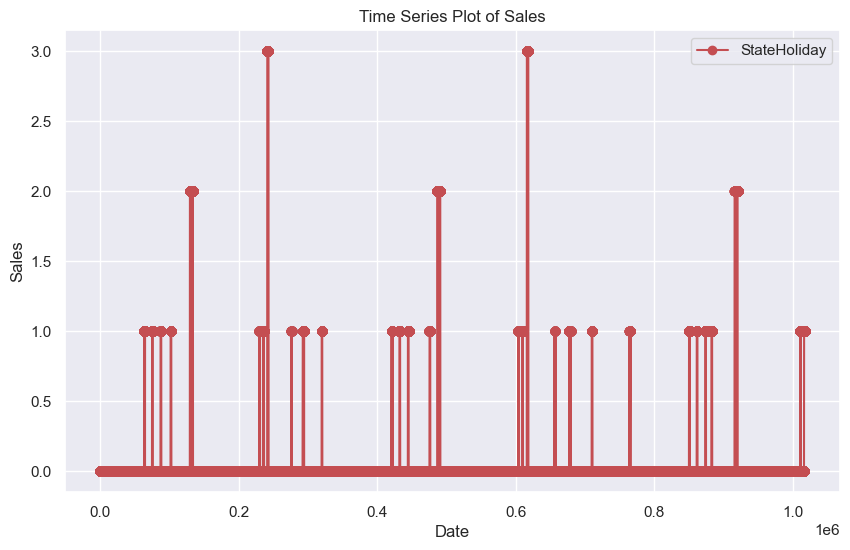

In [65]:
# Plot the time series data

plt.figure(figsize=(10, 6))

plt.plot(train_merged_data['StateHoliday'], label='StateHoliday',marker='o', linestyle='-', color='r')

plt.title('Time Series Plot of Sales')

plt.xlabel('Date')

plt.ylabel('Sales')

plt.legend()

plt.grid(True)

plt.show()
     

In [66]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

In [67]:
# Define a list of relevant column names

relevant_columns = ['Date','Store', 'SalesPerCustomer']

# Extract the relevant columns

selected_data = train_merged_data[relevant_columns]
     

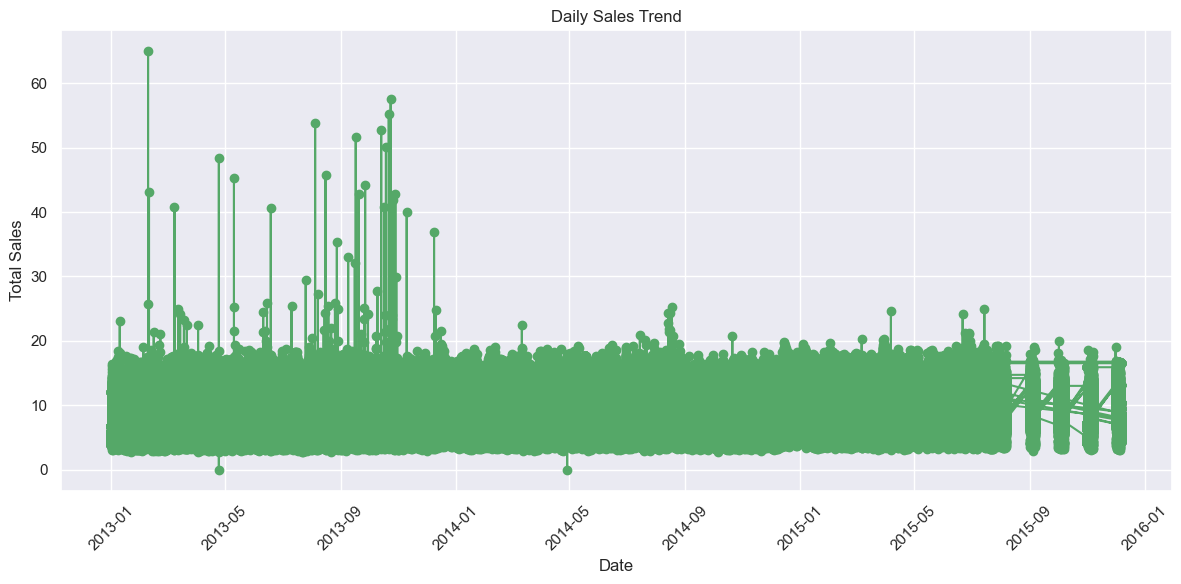

In [68]:
import matplotlib.pyplot as plt

# Create a line plot for daily sales

plt.figure(figsize=(12, 6))

plt.plot(train_merged_data['Date'], train_merged_data['SalesPerCustomer'], marker='o', linestyle='-', color='g')

plt.title('Daily Sales Trend')

plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.grid(True)

# You can customize the plot further as needed

plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
     


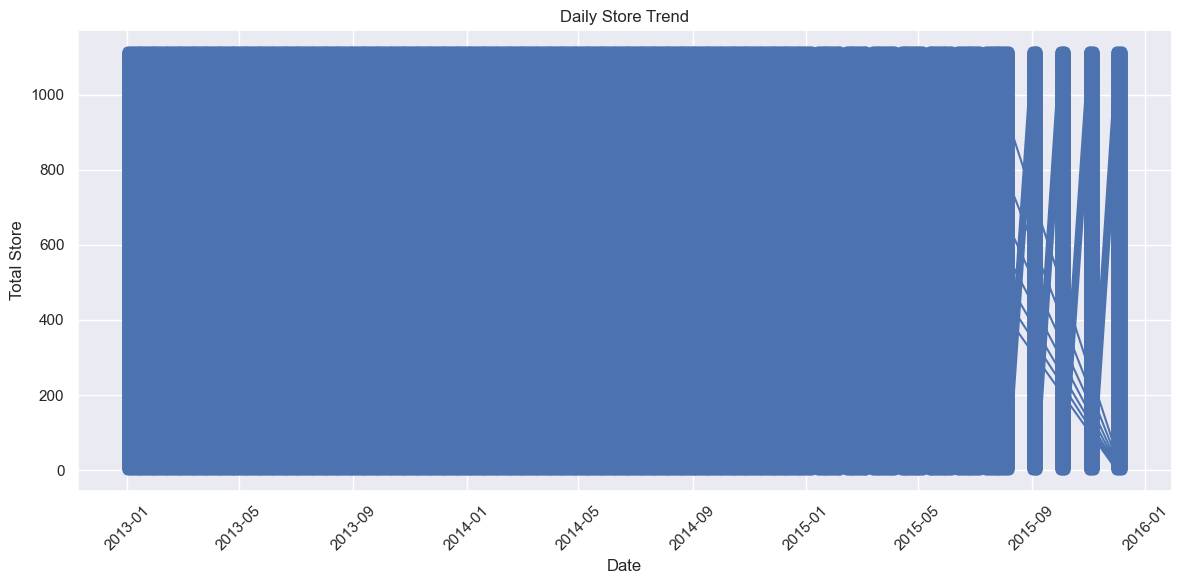

In [69]:
import matplotlib.pyplot as plt

# Create a line plot for daily sales
plt.figure(figsize=(12, 6))
plt.plot(train_merged_data['Date'], train_merged_data['Store'], marker='o', linestyle='-', color='b')
plt.title('Daily Store Trend')
plt.xlabel('Date')
plt.ylabel('Total Store')
plt.grid(True)

# You can customize the plot further as needed
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
     

In [70]:
# Assuming you have a DataFrame named 'train_data_merged'
train_merged_data['Date'] = pd.to_datetime(train_merged_data['Date'])
quarterly_sales = train_merged_data.resample('Q', on='Date')['SalesPerCustomer'].sum()
     

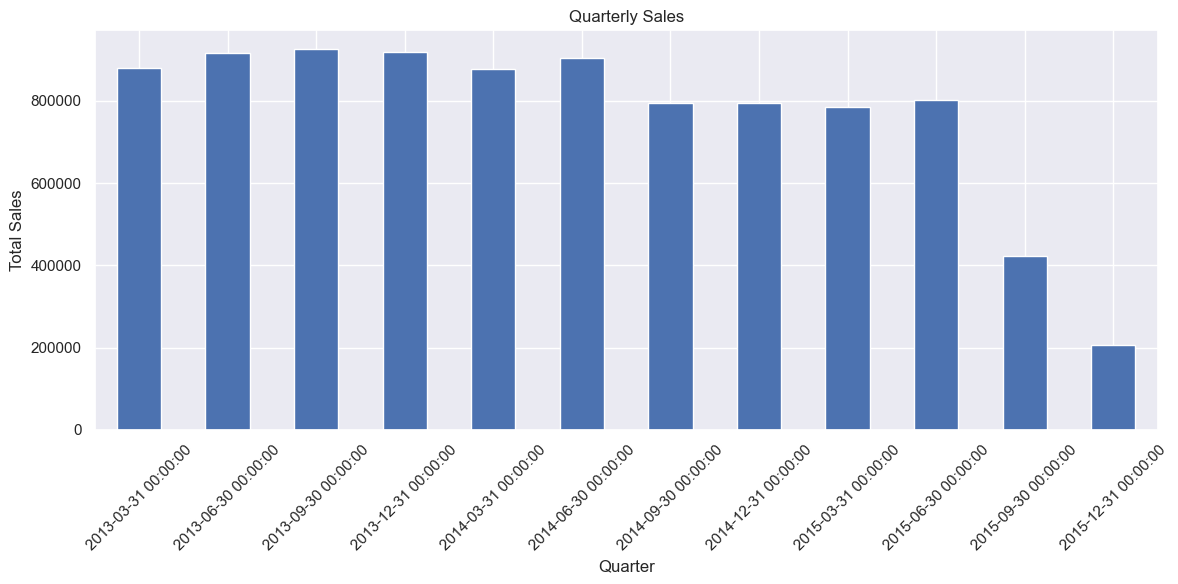

In [71]:
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='bar', color='b')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
# Resample Monthly and Calculate Sum:
monthly_sales = train_merged_data.resample('M', on='Date')['SalesPerCustomer'].sum()
     

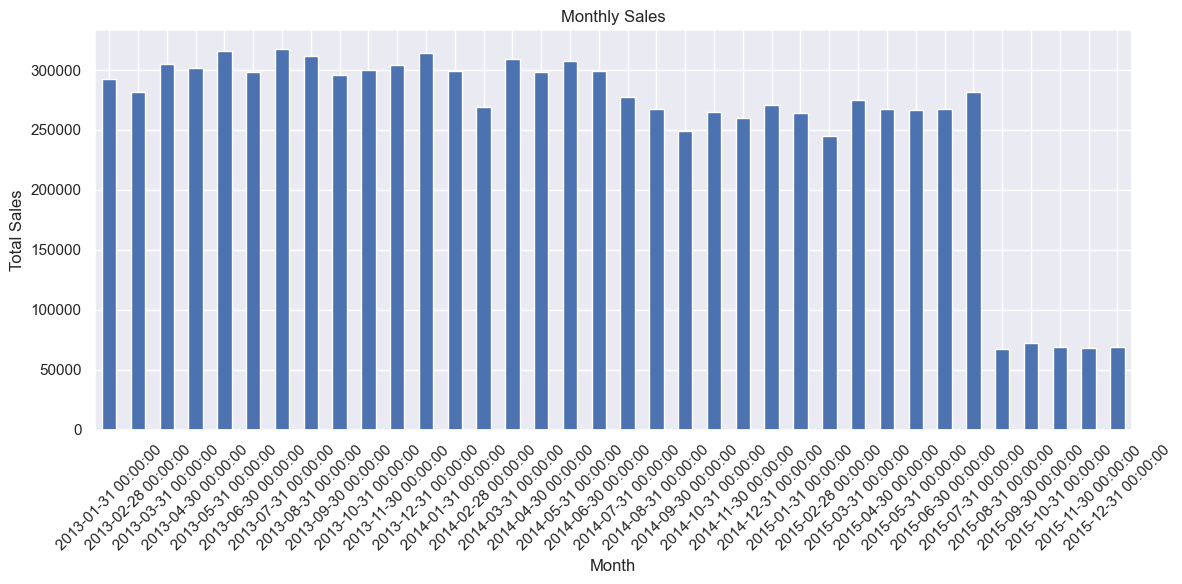

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='b')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


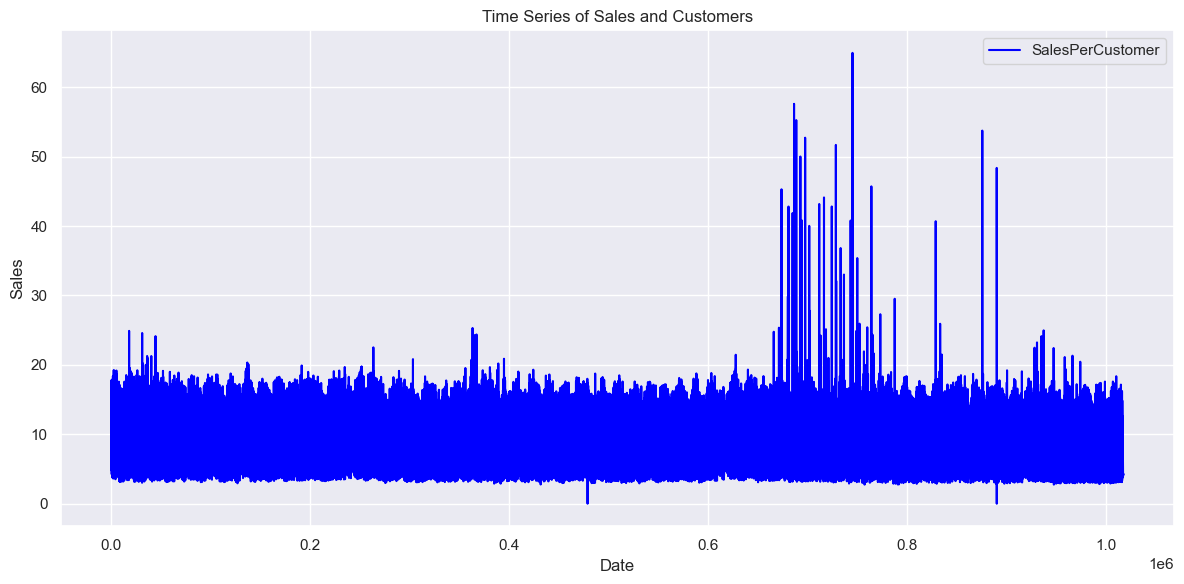

In [74]:
#Time Series of Sales and Customers'
plt.figure(figsize=(12, 6))
plt.plot(train_merged_data.index, train_merged_data['SalesPerCustomer'], label='SalesPerCustomer', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series of Sales and Customers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
     

In [75]:
test_merged_data.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   DayOfWeek                  41088 non-null  int64         
 2   Date                       41088 non-null  datetime64[ns]
 3   Open                       41088 non-null  float64       
 4   Promo                      41088 non-null  int64         
 5   StateHoliday               41088 non-null  int32         
 6   SchoolHoliday              41088 non-null  int64         
 7   StoreType                  41088 non-null  int64         
 8   Assortment                 41088 non-null  int32         
 9   CompetitionDistance        41088 non-null  float64       
 10  CompetitionOpenSinceMonth  41088 non-null  float64       
 11  CompetitionOpenSinceYear   41088 non-null  float64       
 12  Prom

In [76]:
test_merged_data['SalesPerCustomer'] = test_merged_data['Date']
     

test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   DayOfWeek                  41088 non-null  int64         
 2   Date                       41088 non-null  datetime64[ns]
 3   Open                       41088 non-null  float64       
 4   Promo                      41088 non-null  int64         
 5   StateHoliday               41088 non-null  int32         
 6   SchoolHoliday              41088 non-null  int64         
 7   StoreType                  41088 non-null  int64         
 8   Assortment                 41088 non-null  int32         
 9   CompetitionDistance        41088 non-null  float64       
 10  CompetitionOpenSinceMonth  41088 non-null  float64       
 11  CompetitionOpenSinceYear   41088 non-null  float64       
 12  Prom

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(test_merged_data['SalesPerCustomer'], model='additive', period=365)
trend_data = decomposition.trend
     

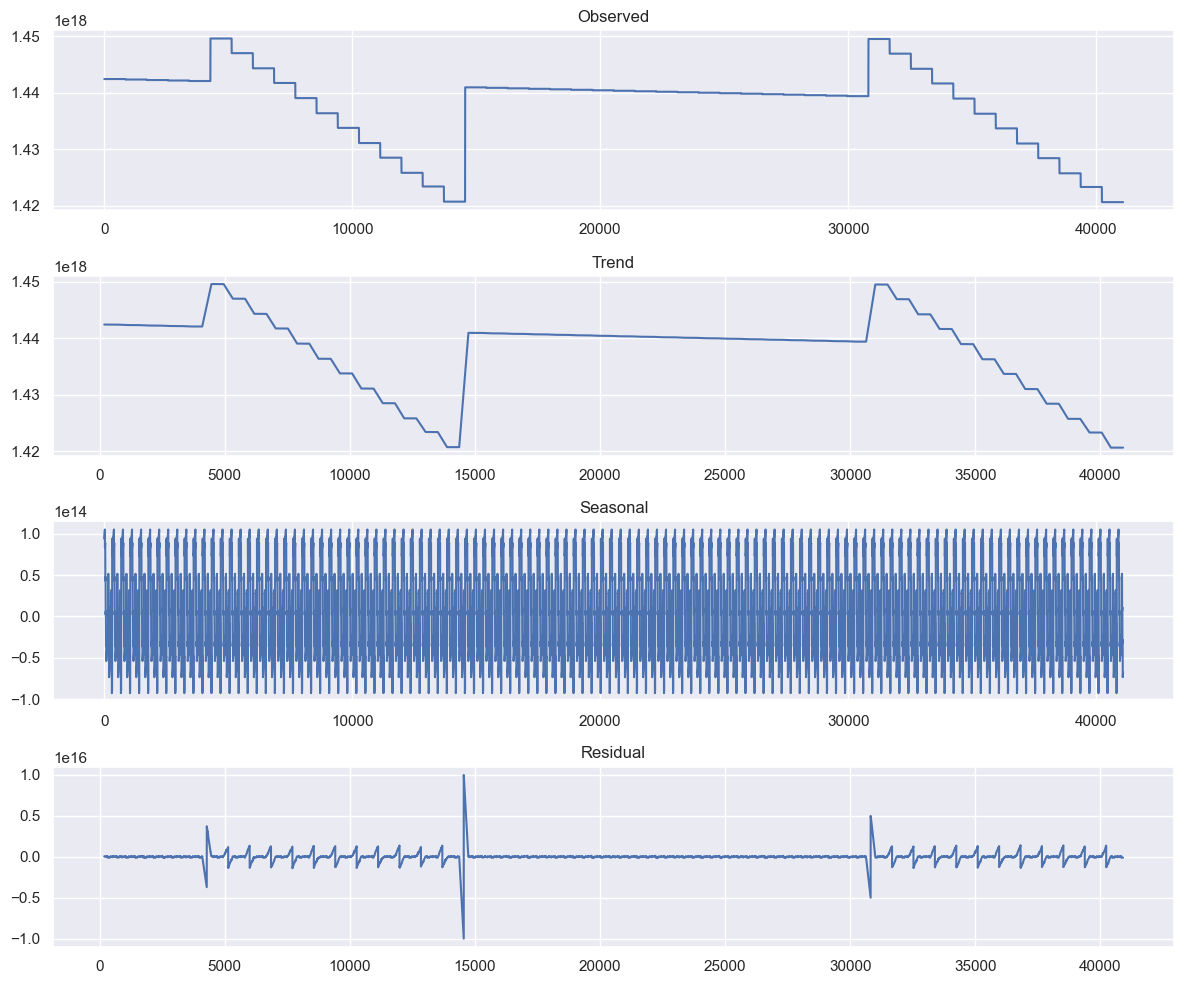

In [78]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

ax1.set_title('Observed')
ax1.plot(decomposition.observed)
ax2.set_title('Trend')
ax2.plot(decomposition.trend)
ax3.set_title('Seasonal')
ax3.plot(decomposition.seasonal)
ax4.set_title('Residual')
ax4.plot(decomposition.resid)
plt.tight_layout()
plt.show()

In [79]:
decomposition = seasonal_decompose(test_merged_data['SalesPerCustomer'], model='multiplicative', period=365)
trend_data = decomposition.trend
     


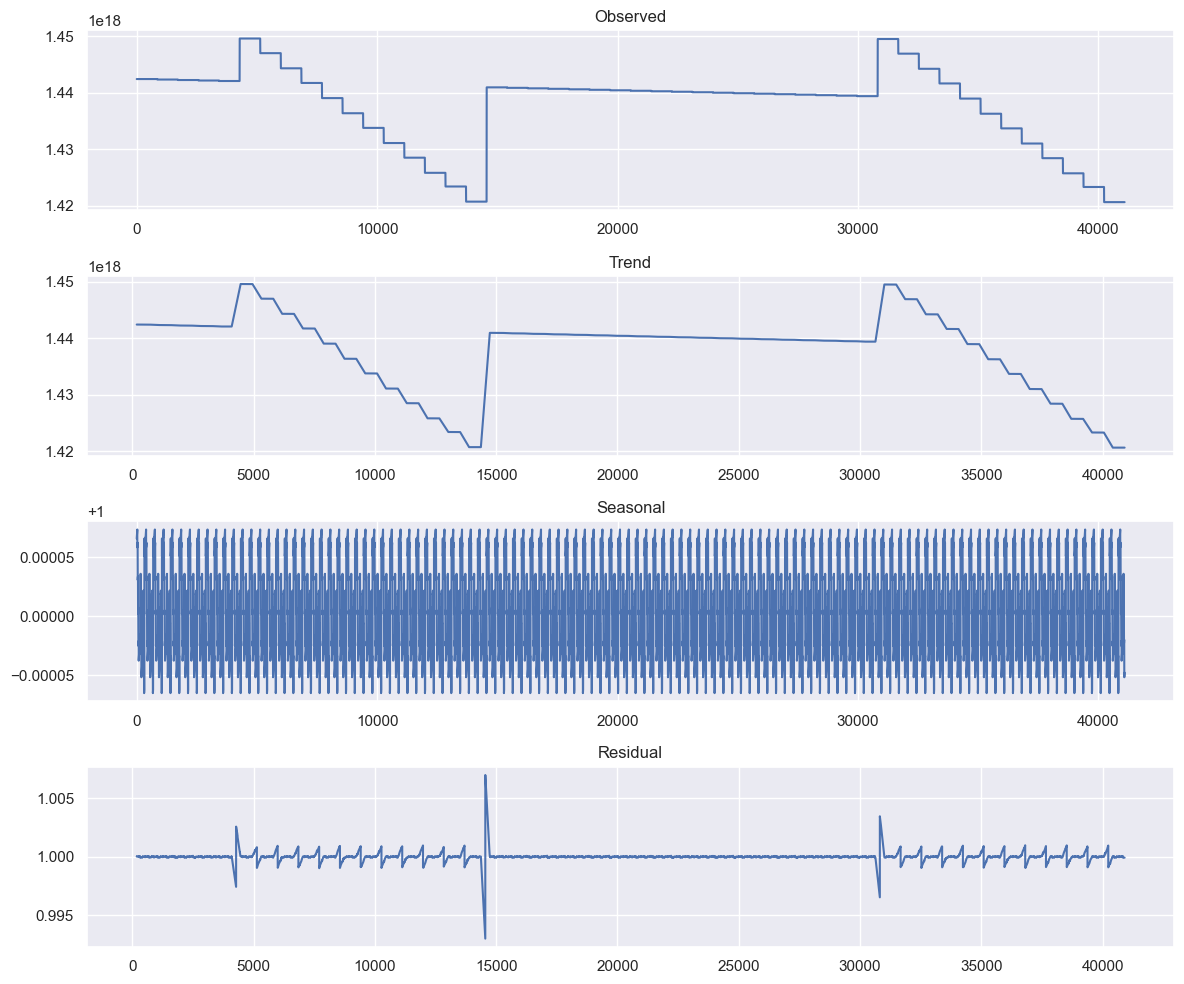

In [80]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
ax1.set_title('Observed')
ax1.plot(decomposition.observed)
ax2.set_title('Trend')
ax2.plot(decomposition.trend)
ax3.set_title('Seasonal')
ax3.plot(decomposition.seasonal)
ax4.set_title('Residual')
ax4.plot(decomposition.resid)
plt.tight_layout()
plt.show()

In [81]:
train_merged_data.columns
     

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

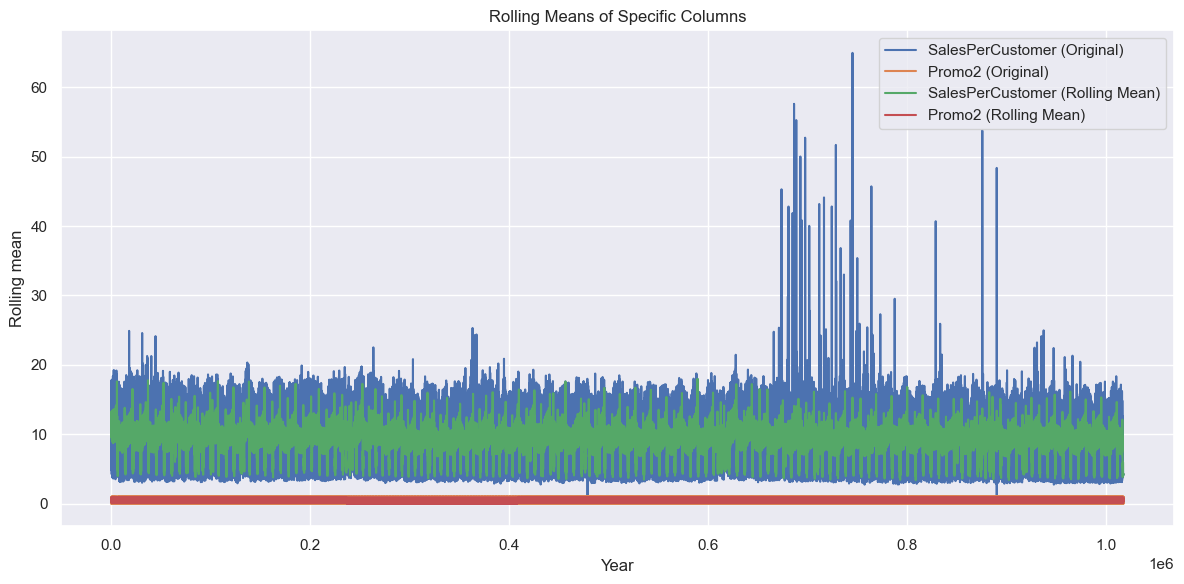

In [82]:
# Specify the columns for which you want to calculate the rolling mean
columns_to_calculate_rolling_mean = ['SalesPerCustomer', 'Promo2']
# Calculate the rolling mean for the specified columns
rolling_mean_window = 10
rolling_means = train_merged_data[columns_to_calculate_rolling_mean].rolling(window=rolling_mean_window).mean()
# Plot the original data and rolling means
plt.figure(figsize=(12, 6))
# Plot the original data
for column in columns_to_calculate_rolling_mean:
    plt.plot(train_merged_data.index, train_merged_data[column], label=f'{column} (Original)')

# Plot the rolling means
for column in columns_to_calculate_rolling_mean:
    plt.plot(rolling_means.index, rolling_means[column], label=f'{column} (Rolling Mean)')

plt.title('Rolling Means of Specific Columns')
plt.xlabel('Year')
plt.ylabel('Rolling mean')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# Resampled time series


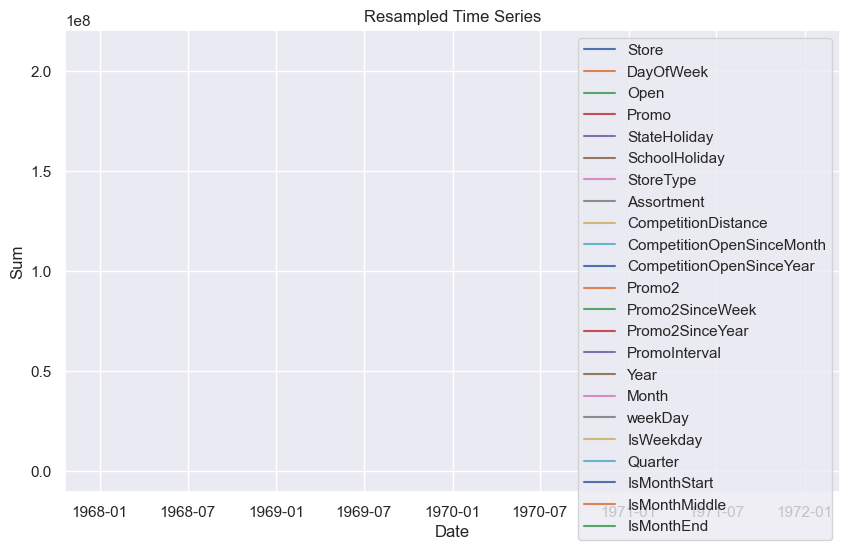

In [83]:
# Convert the index to datetime format

test_merged_data.index = pd.to_datetime(test_merged_data.index)

# Selecting only numeric columns for summation

numeric_columns = test_merged_data.select_dtypes(include=['number']).columns

# Resampling the data

test_data_resampled = test_merged_data[numeric_columns].resample('D').sum()

# Plot the time series

plt.figure(figsize=(10, 6))

for column in numeric_columns:
    
    plt.plot(test_data_resampled.index, test_data_resampled[column], label=column)
    
plt.xlabel('Date')

plt.ylabel('Sum')

plt.title('Resampled Time Series')

plt.legend()

plt.show()

In [84]:
train_merged_data.index = pd.to_datetime(train_merged_data.index)

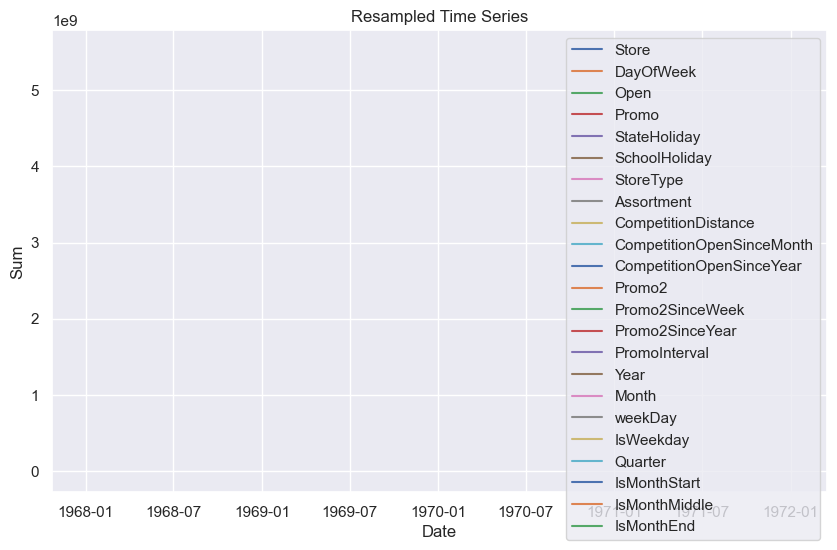

In [85]:
# Resampling the data at a lower frequency (e.g., weekly) for better visualization

resample_frequency = 'W'  # Adjust this frequency as needed

train_data_resampled = train_merged_data[numeric_columns].resample(resample_frequency).sum()

# Plot the time series

plt.figure(figsize=(10, 6))

for column in numeric_columns:
    
    plt.plot(train_data_resampled.index, train_data_resampled[column], label=column)
    
plt.xlabel('Date')

plt.ylabel('Sum')

plt.title('Resampled Time Series')

plt.legend()

plt.show()
     

In [86]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000041087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   DayOfWeek                  41088 non-null  int64         
 2   Date                       41088 non-null  datetime64[ns]
 3   Open                       41088 non-null  float64       
 4   Promo                      41088 non-null  int64         
 5   StateHoliday               41088 non-null  int32         
 6   SchoolHoliday              41088 non-null  int64         
 7   StoreType                  41088 non-null  int64         
 8   Assortment                 41088 non-null  int32         
 9   CompetitionDistance        41088 non-null  float64       
 10  CompetitionOpenSinceMonth  41088 non-null  float64       
 11  CompetitionOpenSinceYe

In [87]:
test_merged_data['SalesPerCustomer'] = test_merged_data['Date'].dt.is_month_start.astype(int)
     

test_merged_data.info()
     

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000041087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   DayOfWeek                  41088 non-null  int64         
 2   Date                       41088 non-null  datetime64[ns]
 3   Open                       41088 non-null  float64       
 4   Promo                      41088 non-null  int64         
 5   StateHoliday               41088 non-null  int32         
 6   SchoolHoliday              41088 non-null  int64         
 7   StoreType                  41088 non-null  int64         
 8   Assortment                 41088 non-null  int32         
 9   CompetitionDistance        41088 non-null  float64       
 10  CompetitionOpenSinceMonth  41088 non-null  float64       
 11  CompetitionOpenSinceYe

In [88]:
# Resampling the data to a weekly frequency and calculating the mean

columns_to_resample = ['SalesPerCustomer']

test_data_weekly_mean = test_merged_data[columns_to_resample].resample('W').mean()

print(test_data_weekly_mean)
     
            

            SalesPerCustomer
1970-01-04               0.0


# Calculate rolling standard deviation

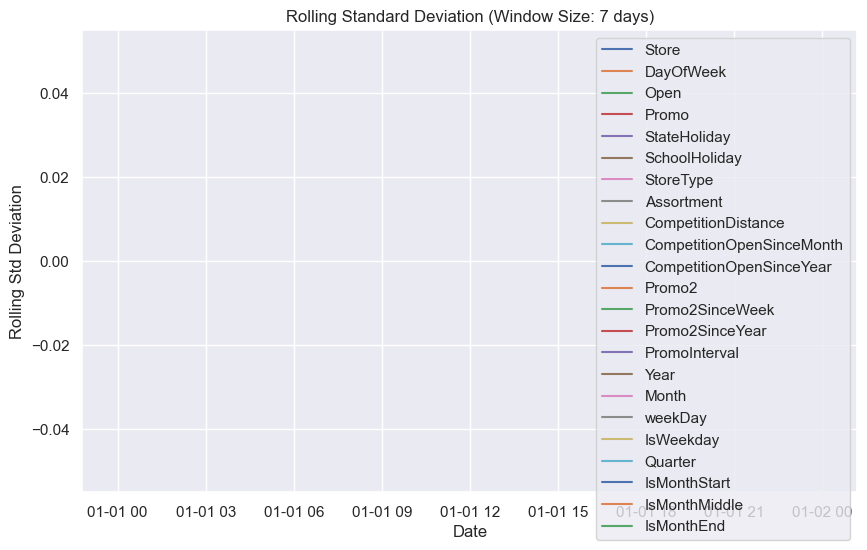

In [89]:
window_size = 7

rolling_std = train_data_resampled.rolling(window=window_size).std()

# Plotting the rolling standard deviation

plt.figure(figsize=(10, 6))

for column in numeric_columns:
    
    plt.plot(rolling_std.index, rolling_std[column], label=column)
    
plt.xlabel('Date')

plt.ylabel('Rolling Std Deviation')

plt.title(f'Rolling Standard Deviation (Window Size: {window_size} days)')

plt.legend()

plt.show()

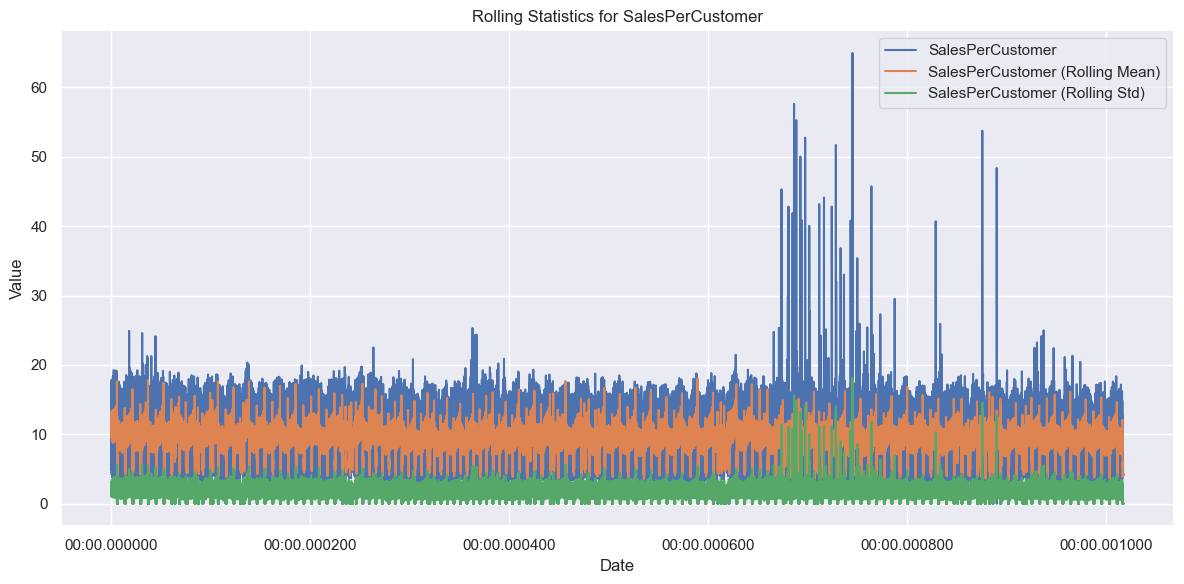

In [90]:
# Specify the column for which you want to calculate rolling statistics

column_to_calculate_rolling_stats = 'SalesPerCustomer'

# Calculate the rolling mean and rolling standard deviation

rolling_window = 10  # You can adjust the window size as needed

rolling_mean = train_merged_data[column_to_calculate_rolling_stats].rolling(window=rolling_window).mean()

rolling_std = train_merged_data[column_to_calculate_rolling_stats].rolling(window=rolling_window).std()

# Create a plot of rolling statistics

plt.figure(figsize=(12, 6))

plt.plot(train_merged_data.index, train_merged_data[column_to_calculate_rolling_stats], label=f'{column_to_calculate_rolling_stats}')

plt.plot(train_merged_data.index, rolling_mean, label=f'{column_to_calculate_rolling_stats} (Rolling Mean)')

plt.plot(train_merged_data.index, rolling_std, label=f'{column_to_calculate_rolling_stats} (Rolling Std)')

plt.title(f'Rolling Statistics for {column_to_calculate_rolling_stats}')

plt.xlabel('Date')

plt.ylabel('Value')

plt.legend()

plt.grid(True)

# Show the plot

plt.tight_layout()

plt.show()
     

In [91]:
# descriptive statistics of rolling standard deviation and mean

print("Rolling Standard Deviation:")

print(rolling_std.describe())

print("\nRolling Mean:")

print(rolling_mean.describe())
     

Rolling Standard Deviation:
count    1.017200e+06
mean     1.682330e+00
std      8.565606e-01
min      0.000000e+00
25%      1.381864e+00
50%      1.822138e+00
75%      2.222616e+00
max      1.811716e+01
Name: SalesPerCustomer, dtype: float64

Rolling Mean:
count    1.017200e+06
mean     9.068798e+00
std      1.750024e+00
min      3.383450e+00
25%      8.448802e+00
50%      9.236124e+00
75%      1.004201e+01
max      1.799194e+01
Name: SalesPerCustomer, dtype: float64


# Seasonality Plot:


The seasonality plot displays repeating patterns that occur at regular intervals. It helps identify consistent
patterns that recur over time. These patterns could be daily, weekly, monthly, or even yearly. In retail, for instance, 
if 'Sales' exhibit spikes around the same time each year (e.g., holiday season), it indicates a strong seasonal pattern.

In [92]:
import statsmodels.api as sm
     

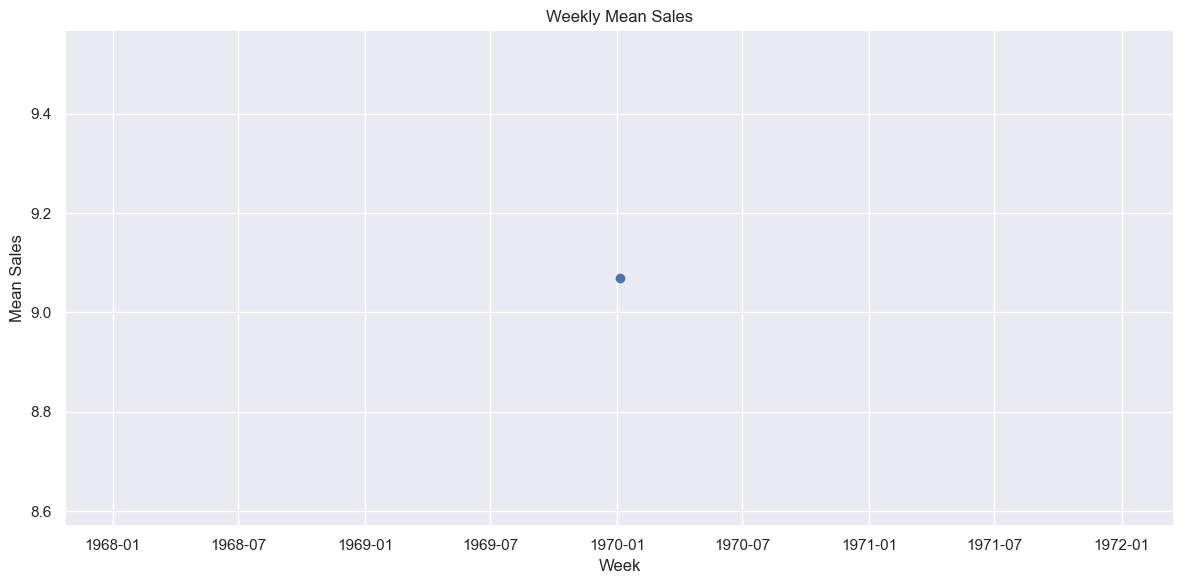

In [93]:


# Resample to weekly frequency and calculate mean sales

weekly_mean_sales = train_merged_data['SalesPerCustomer'].resample('W').mean()

# Create a plot of the weekly mean sales

plt.figure(figsize=(12, 6))

plt.plot(weekly_mean_sales.index, weekly_mean_sales.values, marker='o', linestyle='-')

plt.title('Weekly Mean Sales')

plt.xlabel('Week')

plt.ylabel('Mean Sales')

plt.grid(True)

# Show the plot

plt.tight_layout()

plt.show()


In [94]:
weekly_sales = train_merged_data['SalesPerCustomer'].resample('W').mean()
     


In [95]:
# Calculate first differences
diff_series = weekly_sales.diff(periods=1).dropna()
     

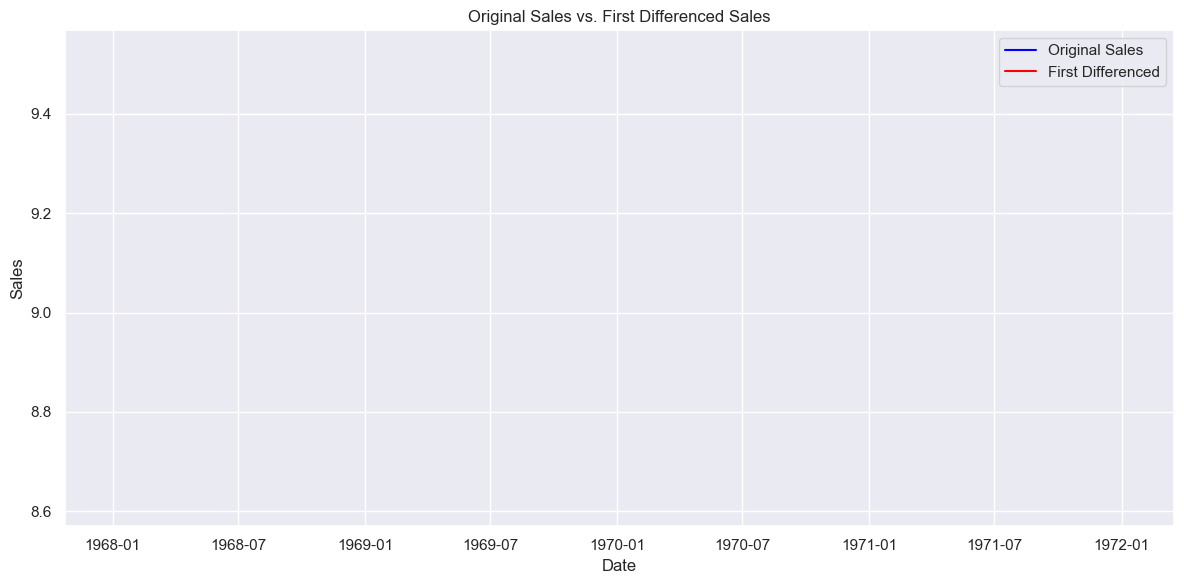

In [96]:
# Create a single plot

plt.figure(figsize=(12, 6))

# Original time series

plt.plot(weekly_sales, label='Original Sales', color='blue')

# First differenced series

plt.plot(diff_series, label='First Differenced', color='red')

plt.title('Original Sales vs. First Differenced Sales')

plt.xlabel('Date')

plt.ylabel('Sales')

plt.legend()

plt.tight_layout()

plt.show()
     


In [97]:
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

     

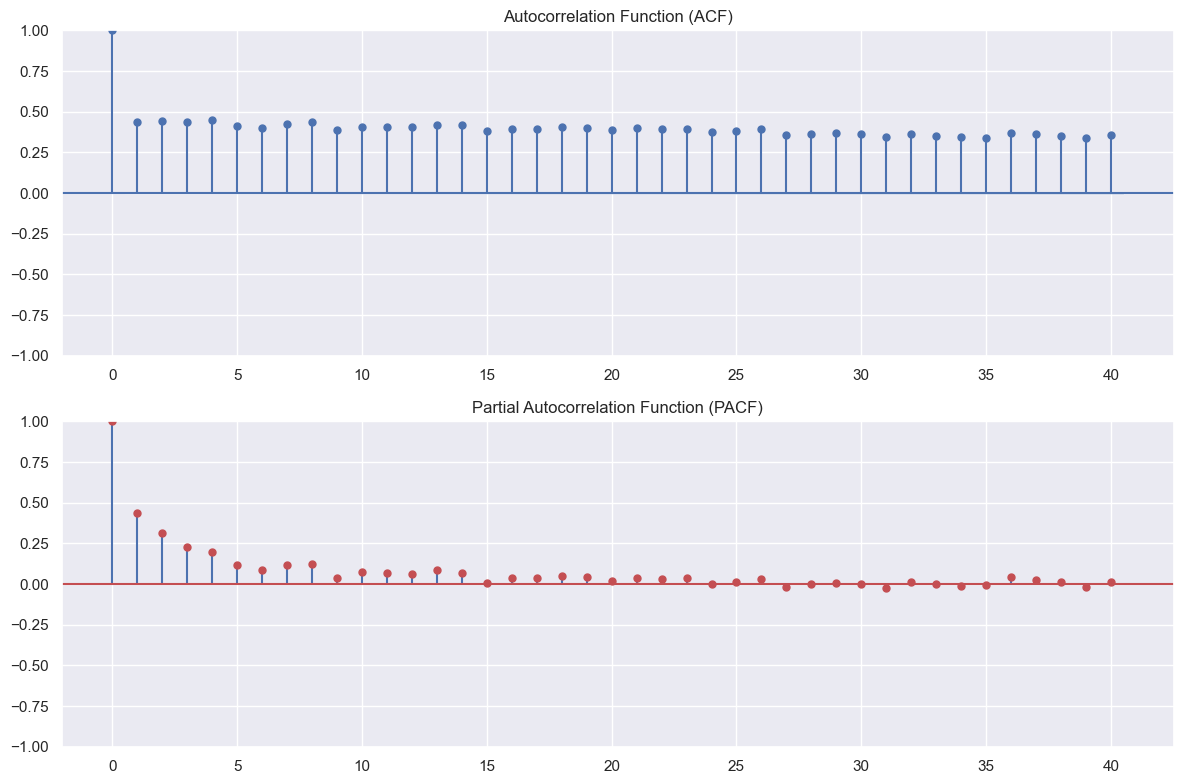

In [98]:
# Create subplots for ACF and PACF in a single figure

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF with blue color

plot_acf(train_merged_data['SalesPerCustomer'], lags=40, ax=ax1, color='b', title='Autocorrelation Function (ACF)')

# Plot PACF with red color

plot_pacf(train_merged_data['SalesPerCustomer'], lags=40, ax=ax2, color='r', title='Partial Autocorrelation Function (PACF)')

# Adjust layout and display the plot

plt.tight_layout()

plt.show()
     


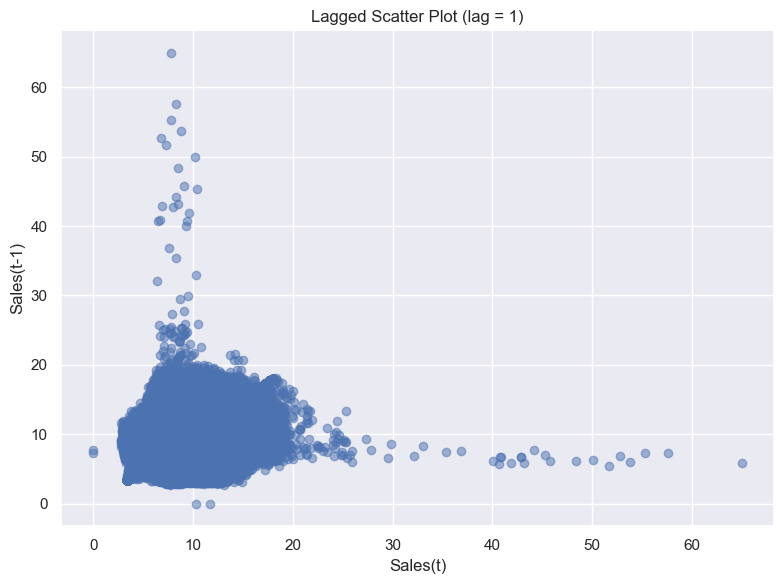

In [99]:
lag = 1  # Adjust the lag as needed

# Create a lagged DataFrame

lagged_df = train_merged_data.shift(periods=lag)

# Plot the lagged scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(train_merged_data['SalesPerCustomer'], lagged_df['SalesPerCustomer'], alpha=0.5)

plt.title(f'Lagged Scatter Plot (lag = {lag})')

plt.xlabel('Sales(t)')

plt.ylabel(f'Sales(t-{lag})')

plt.grid(True)

# Show the plot

plt.tight_layout()

plt.show()

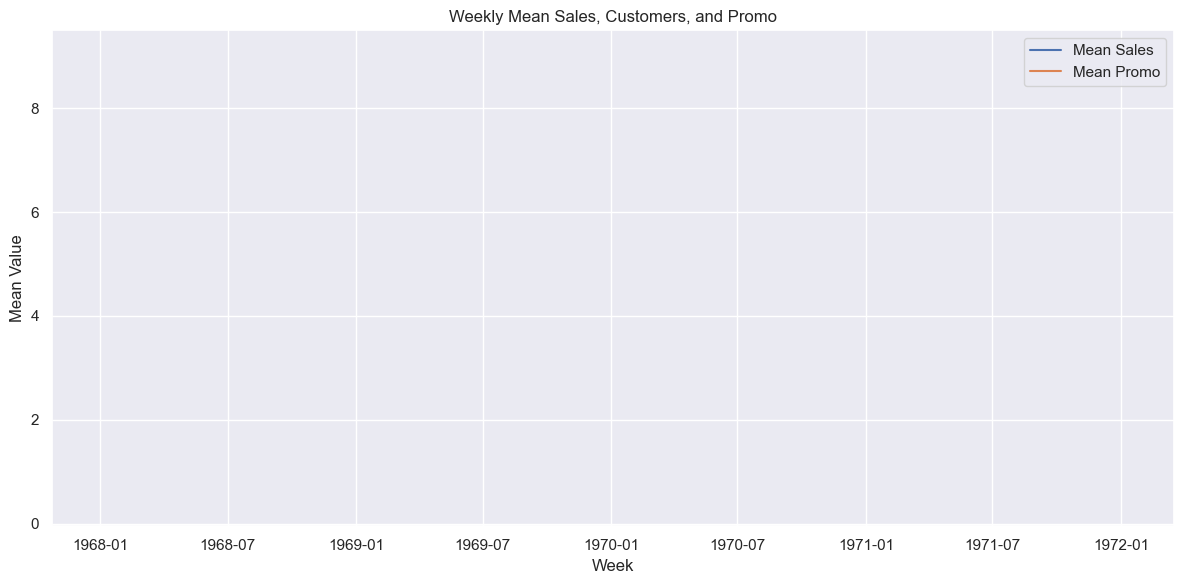

In [100]:
 #Resample to weekly frequency and calculate mean values
    
weekly_mean = train_merged_data.resample('W').mean()

# Create a plot for mean sales, mean customers, and mean promo

plt.figure(figsize=(12, 6))

plt.plot(weekly_mean.index, weekly_mean['SalesPerCustomer'], label='Mean Sales')

plt.plot(weekly_mean.index, weekly_mean['Promo'], label='Mean Promo')

plt.title('Weekly Mean Sales, Customers, and Promo')

plt.xlabel('Week')

plt.ylabel('Mean Value')

plt.legend()

plt.grid(True)

# Show the plot

plt.tight_layout()

plt.show()

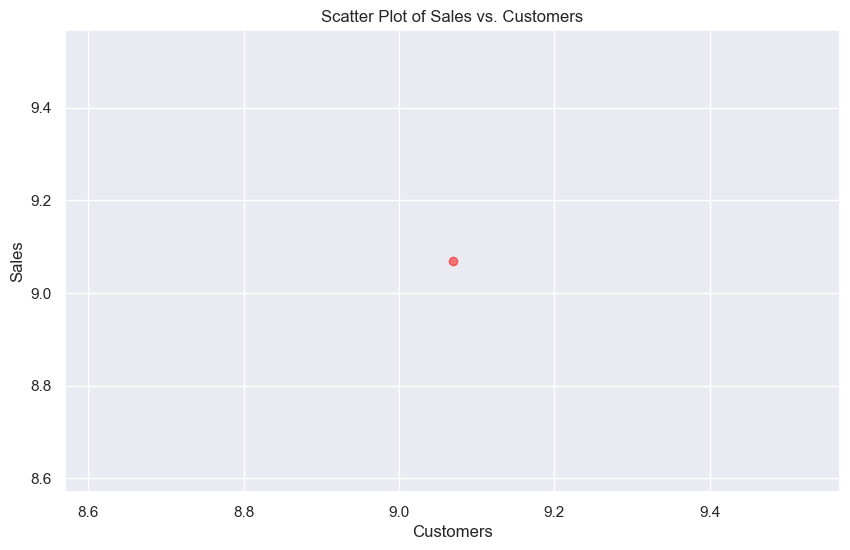

In [101]:

# Create a scatter plot of sales vs. customers with color by Promo

plt.figure(figsize=(10, 6))

colors = ['blue' if promo == 1 else 'red' for promo in weekly_mean['Promo']]

plt.scatter(weekly_mean['SalesPerCustomer'], weekly_mean['SalesPerCustomer'], c=colors, alpha=0.5)

plt.title('Scatter Plot of Sales vs. Customers')

plt.xlabel('Customers')

plt.ylabel('Sales')

plt.show()

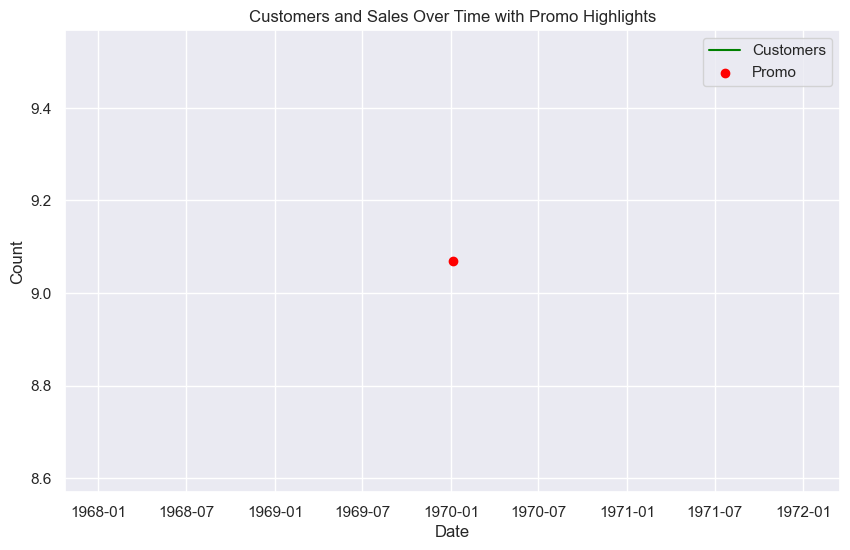

In [102]:
plt.figure(figsize=(10, 6))

plt.plot(weekly_mean['SalesPerCustomer'], label='Customers', color='green')

promo_indices = weekly_mean[weekly_mean['Promo'] > 0].index

plt.scatter(promo_indices, weekly_mean.loc[promo_indices, 'SalesPerCustomer'], color='red', label='Promo')

plt.xlabel('Date')

plt.ylabel('Count')

plt.title('Customers and Sales Over Time with Promo Highlights')

plt.legend()

plt.show()

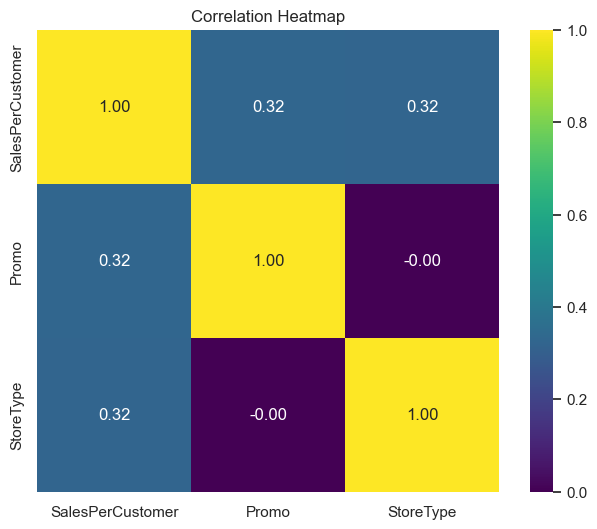

In [103]:
selected_columns = ['SalesPerCustomer', 'Promo','StoreType']


# Calculate the correlation matrix

correlation_matrix = train_merged_data[selected_columns].corr()

custom_cmap = 'viridis'

# Create a heatmap of the correlation matrix

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap,fmt=".2f", square=True)

plt.title('Correlation Heatmap')

plt.show()

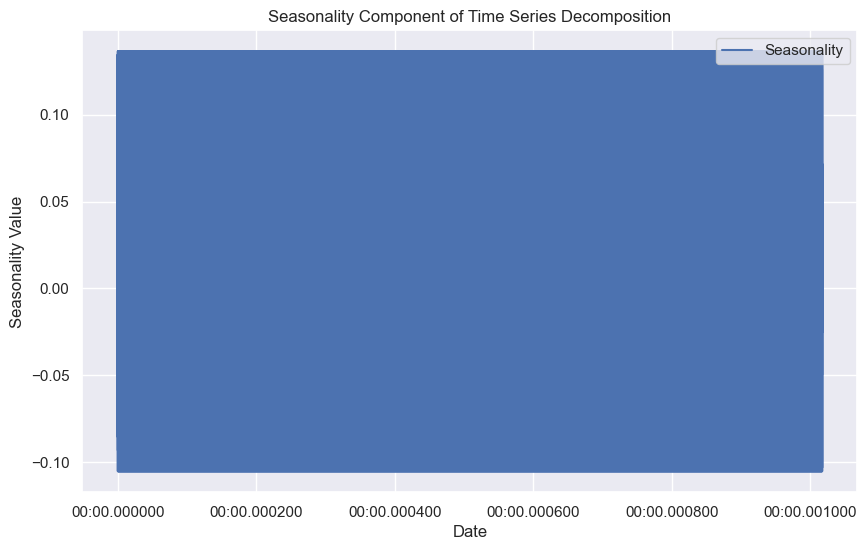

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing time series decomposition on the 'Sales' column with yearly frequency

decomposition_result = seasonal_decompose(train_merged_data['SalesPerCustomer'], model='additive', period=365)

seasonality_data = decomposition_result.seasonal

# Create a time index for the x-axis (assuming 'Date' is your index)

time_index = seasonality_data.index

# Plot the seasonality component

plt.figure(figsize=(10, 6))

plt.plot(time_index, seasonality_data, label='Seasonality')

plt.title('Seasonality Component of Time Series Decomposition')

plt.xlabel('Date')

plt.ylabel('Seasonality Value')

plt.legend()

plt.show()

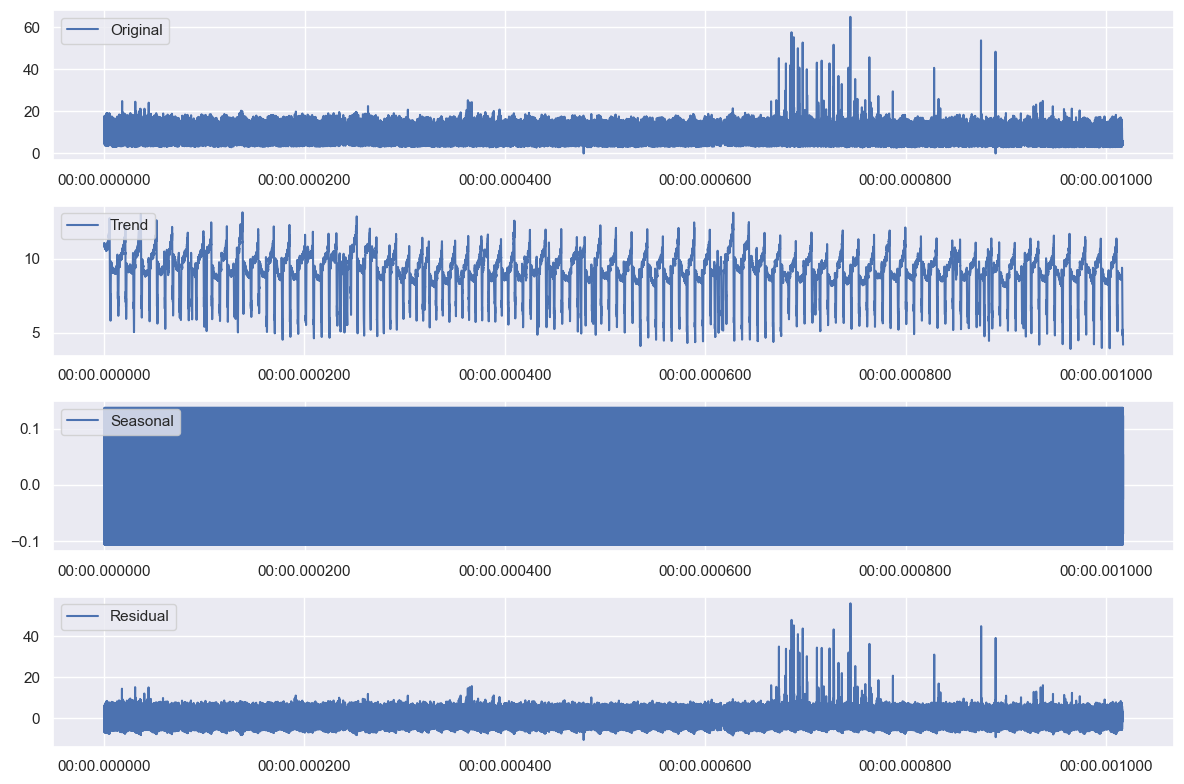

In [105]:
decomposition = sm.tsa.seasonal_decompose(train_merged_data['SalesPerCustomer'], period=365)

# Plot the decomposed components

plt.figure(figsize=(12, 8))

# Original sales data

plt.subplot(411)

plt.plot(train_merged_data['SalesPerCustomer'], label='Original')

plt.legend(loc='upper left')

# Trend component

plt.subplot(412)

plt.plot(decomposition.trend, label='Trend')

plt.legend(loc='upper left')

# Seasonal component

plt.subplot(413)

plt.plot(decomposition.seasonal, label='Seasonal')

plt.legend(loc='upper left')

# Residual component

plt.subplot(414)

plt.plot(decomposition.resid, label='Residual')

plt.legend(loc='upper left')

# Adjust layout and display the plots

plt.tight_layout()

plt.show()

In [106]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

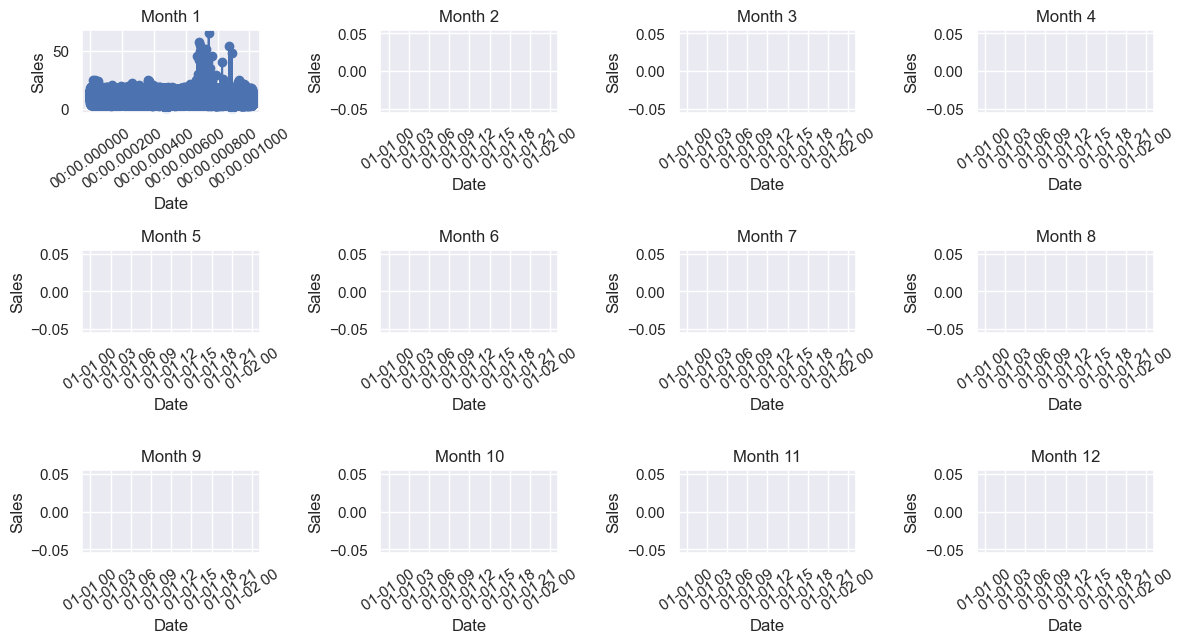

In [107]:

# Extract the month from the 'Date' column

train_merged_data['Month'] = train_merged_data.index.month

# Create a Seasonal Subseries Plot

plt.figure(figsize=(12, 8))

# Iterate through each month and create subplots

for i in range(1, 13):  # Assuming data spans all 12 months
    
    month_data = train_merged_data[train_merged_data['Month'] == i]  # Extract data for the current month
    
    plt.subplot(4, 4, i)  # Create a subplot for the current month
    
    plt.plot(month_data.index, month_data['SalesPerCustomer'], marker='o', linestyle='-')
    
    plt.title(f'Month {i}')
    
    plt.xlabel('Date')
    
    plt.ylabel('Sales')
    
    plt.xticks(rotation=35)
    
    plt.grid(True)

# Adjust layout and display the plots

plt.tight_layout()

plt.show()
     

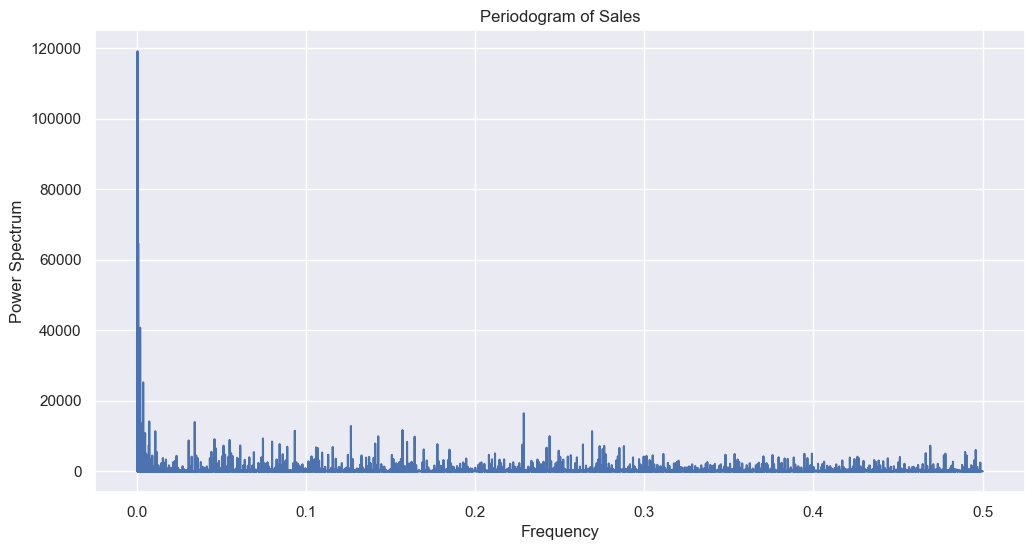

In [108]:
# Periodogram
from scipy.signal import periodogram

# Computing the periodogram of the time series

frequencies, power_spectrum = periodogram(train_merged_data['SalesPerCustomer'])

# Plotting the periodogram

plt.figure(figsize=(12, 6))

plt.plot(frequencies, power_spectrum)

plt.title('Periodogram of Sales')

plt.xlabel('Frequency')

plt.ylabel('Power Spectrum')

plt.show()
     

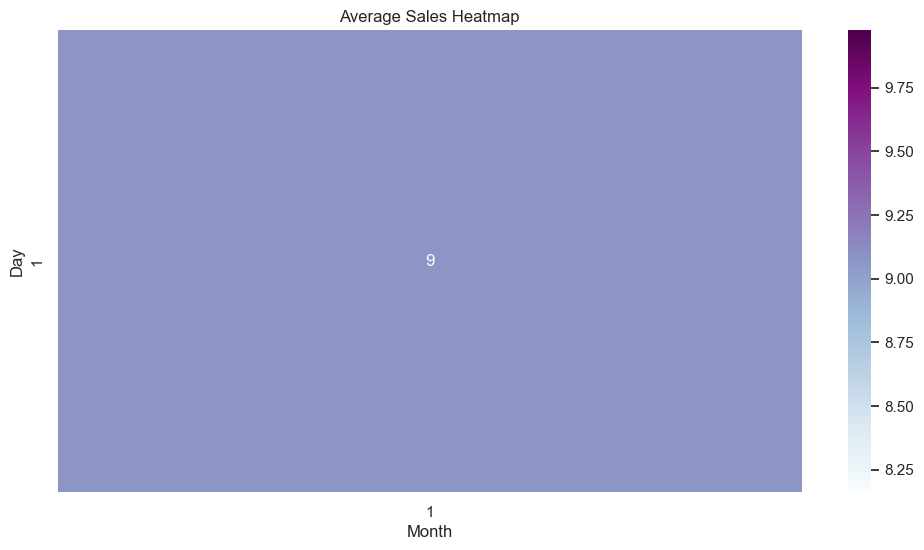

In [109]:
# Heatmap
import numpy as np

# heatmap of average sales across days and months

heatmap_data =train_merged_data.pivot_table(values='SalesPerCustomer', index=train_merged_data.index.day, columns=train_merged_data.index.month, aggfunc=np.mean)

plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data, cmap="BuPu", annot=True, fmt=".0f")

plt.title('Average Sales Heatmap')

plt.xlabel('Month')

plt.ylabel('Day')

plt.show()

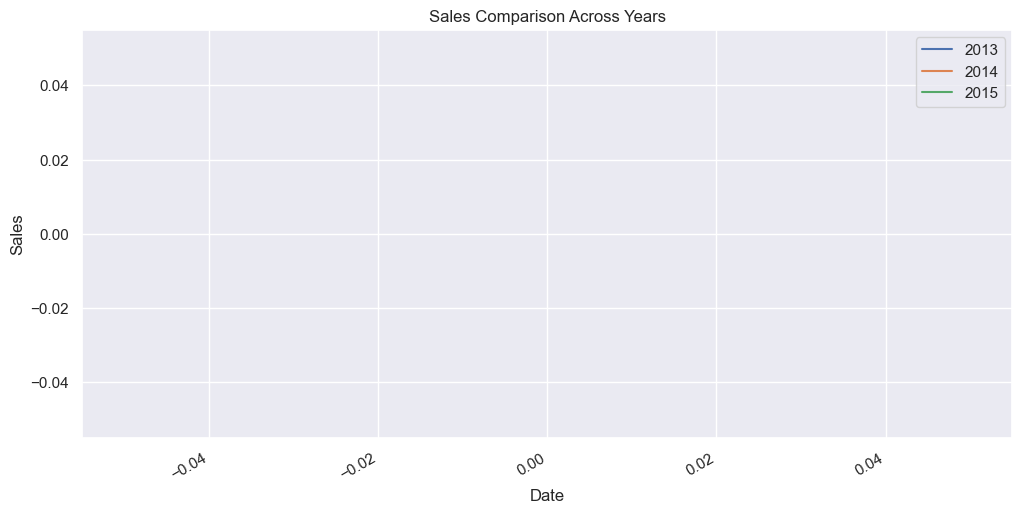

In [110]:
# Create a filter for each year and generate plots

sales_2013 = train_merged_data[train_merged_data.index.year == 2013]['SalesPerCustomer']

sales_2014 = train_merged_data[train_merged_data.index.year == 2014]['SalesPerCustomer']

sales_2015 = train_merged_data[train_merged_data.index.year == 2015]['SalesPerCustomer']

# Plotting comparison across years

plt.figure(figsize=(12, 6))

sales_2013.plot(label='2013')

sales_2014.plot(label='2014')

sales_2015.plot(label='2015')

plt.title('Sales Comparison Across Years')

plt.xlabel('Date')

plt.ylabel('Sales')

plt.legend()

plt.show()


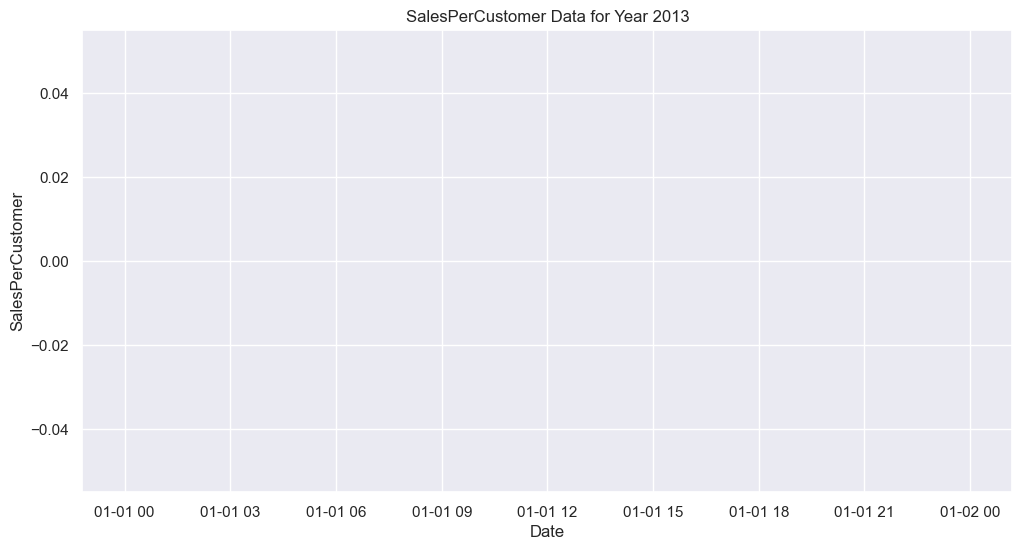

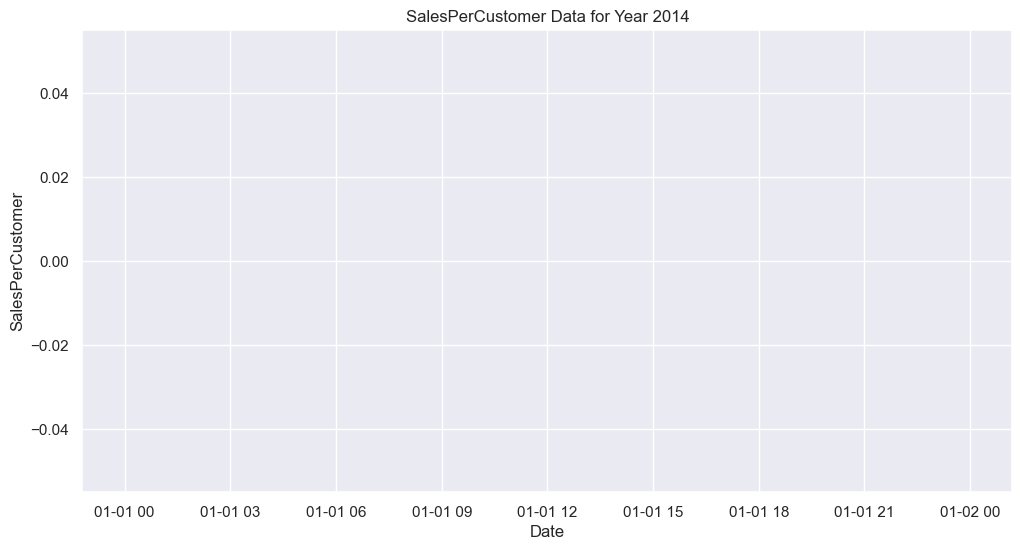

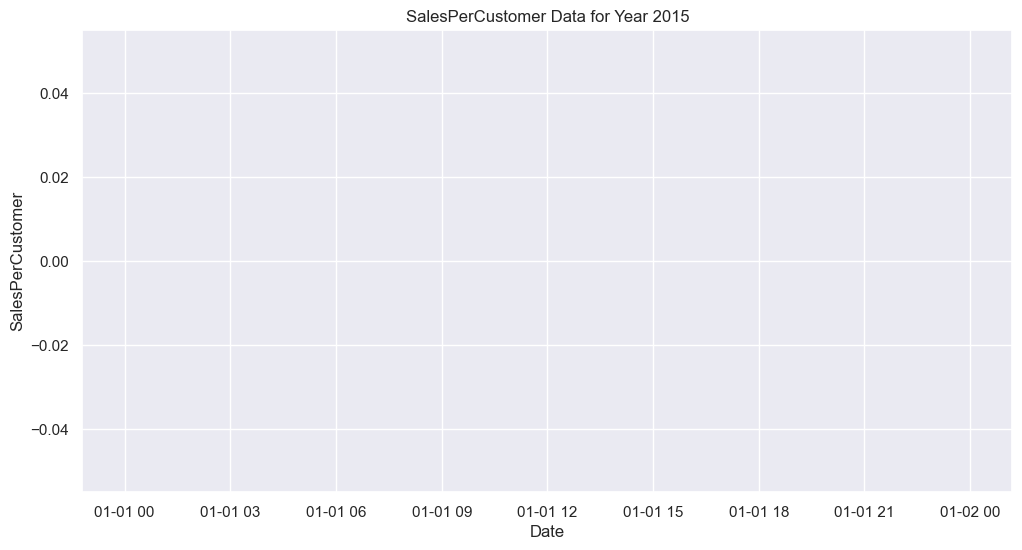

In [111]:
# Set the 'Date' column as the index (if not already)

train_merged_data.index = pd.to_datetime(train_merged_data.index)

# Create a list of years to loop through

years = [2013, 2014, 2015]

# Generate separate plots for each year

for year in years:
    
    sales_data = train_merged_data[train_merged_data.index.year == year]['SalesPerCustomer']

    # Create a plot for each year
    
    plt.figure(figsize=(12, 6))
    
    plt.plot(sales_data.index, sales_data, marker='o', linestyle='-')
    
    plt.title(f'SalesPerCustomer Data for Year {year}')
    
    plt.xlabel('Date')
    
    plt.ylabel('SalesPerCustomer')
    
    plt.grid(True)

    # Save the plot or display it as needed
    # To save the plot as an image file, use plt.savefig(f'sales_{year}.png')

    plt.show()
     

# Stationarity Check

Text(0, 0.5, 'SalesPerCustomer')

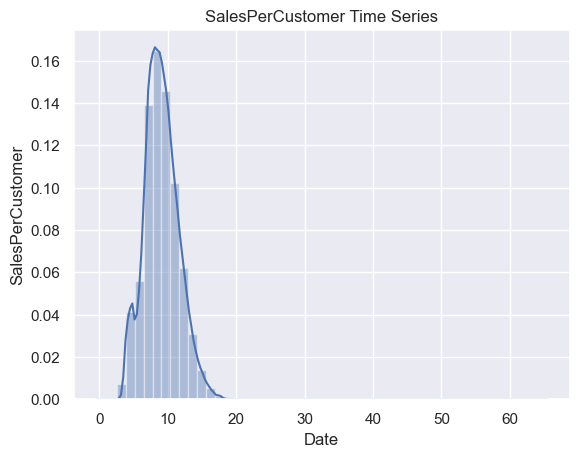

In [112]:
from statsmodels.tsa.stattools import adfuller
     

time_series = train_merged_data['SalesPerCustomer']
     

sns.distplot(train_merged_data['SalesPerCustomer'])

plt.title('SalesPerCustomer Time Series')

plt.xlabel('Date')

plt.ylabel('SalesPerCustomer')
     

# Cyclicality:


Cyclicality refers to the presence of long-term periodic patterns in a time series that are not tied to a
fixed frequency like seasonality. These cycles usually last longer than a year and are not as regular as seasonal 
patterns. Cycles can be caused by economic, political, or social factors that influence the data over time. Unlike 
seasonality, cyclic patterns are not as predictable and can vary in amplitude and duration.

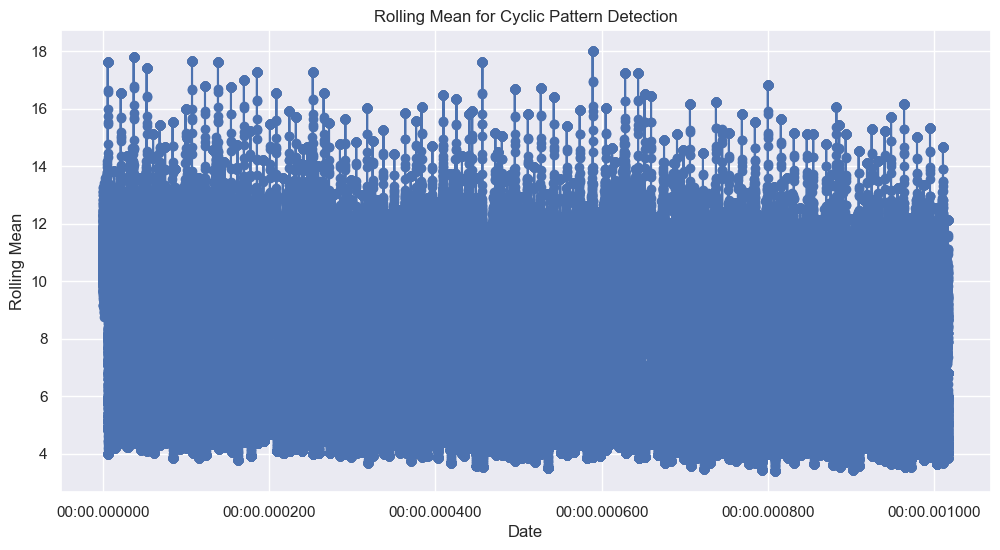

In [113]:
window_size = 10  

rolling_mean = train_merged_data['SalesPerCustomer'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot( train_merged_data.index, rolling_mean, marker='o', linestyle='-')

plt.title('Rolling Mean for Cyclic Pattern Detection')

plt.xlabel('Date')

plt.ylabel('Rolling Mean')

plt.grid(True)

plt.show()

# Irregularity:



Irregularity, also known as residual or noise, represents the random fluctuations and unpredictable components
present in a time series data. It encompasses all the factors that are not accounted for by the trend, seasonality, 
and cyclic patterns. Irregular components can be caused by random events, measurement errors, or other external factors 
that are difficult to model.




In [114]:
!pip install statsmodels

In [115]:
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import adfuller

In [116]:
# Define a function to perform the ADF test

def adf_test(series):
    
    result = adfuller(series)
    
    print("ADF Statistic:", result[0])
    
    print("p-value:", result[1])
    
    print("Critical Values:", result[4])
    
    print("Is Stationary:", result[1] <= 0.05)

# Subsample a portion of the time series

subsample_size = 1000  # Adjust the size as needed

subsampled_series = train_merged_data['SalesPerCustomer'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series

adf_test(subsampled_series)
     

ADF Statistic: -14.33909182442837
p-value: 1.0675813685218877e-26
Critical Values: {'1%': -3.4369391965679257, '5%': -2.86444914142694, '10%': -2.5683189679553546}
Is Stationary: True


In [117]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Subsample a portion of the time series
subsample_size = 1000
subsampled_series = train_merged_data['SalesPerCustomer'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)
     

ADF Statistic: -30.59284850714652
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True


# ARIMA (AutoRegressive Integrated Moving Average):

ARIMA models are versatile and can handle both trend and 
seasonality in data.
They consist of three main components: AutoRegressive (AR) terms, Integrated
(I) terms for differencing, and Moving Average (MA) terms. Model selection
involves determining the order of these components (p, d, q) based on ACF 
and PACF plots. You can use functions like auto_arima from the pmdarima 
library for automatic ARIMA order selection. SARIMA (Seasonal ARIMA)

In [120]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [121]:
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA

from pmdarima import auto_arima

     

C:\Users\shita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\shita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\shita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       SalesPerCustomer   No. Observations:              1017209
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -2130331.631
Date:                Sat, 03 Feb 2024   AIC                        4260669.262
Time:                        10:53:36   BIC                        4260704.760
Sample:                    01-01-1970   HQIC                       4260679.024
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0029      0.001      2.985      0.003       0.001       0.005
ma.L1         -0.9125      0.000  -2168.246      0.000      -0.913      -0.912
sigma2         3.8601      0.003   1256.737      0.0

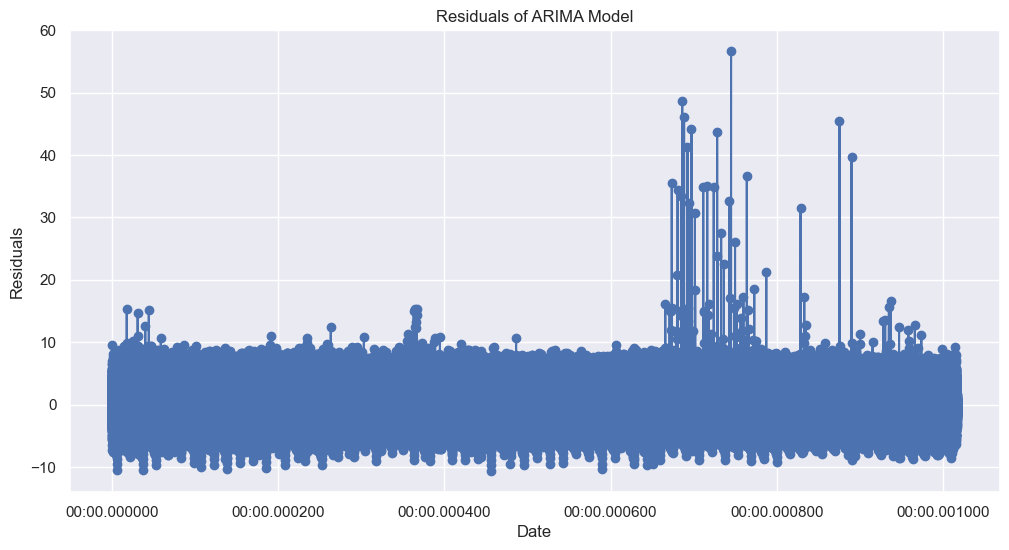

In [122]:
p = 1  # Replace with the determined AR order

d = 1  # Replace with the determined differencing order

q = 1  # Replace with the determined MA order

arima_model = sm.tsa.ARIMA(train_merged_data['SalesPerCustomer'], order=(p, d, q))

arima_results = arima_model.fit()


# Print the model summary

print(arima_results.summary())

# Plot the residuals

plt.figure(figsize=(12, 6))

plt.plot(arima_results.resid.index, arima_results.resid, marker='o', linestyle='-')

plt.title('Residuals of ARIMA Model')

plt.xlabel('Date')

plt.ylabel('Residuals')

plt.grid(True)

plt.show()

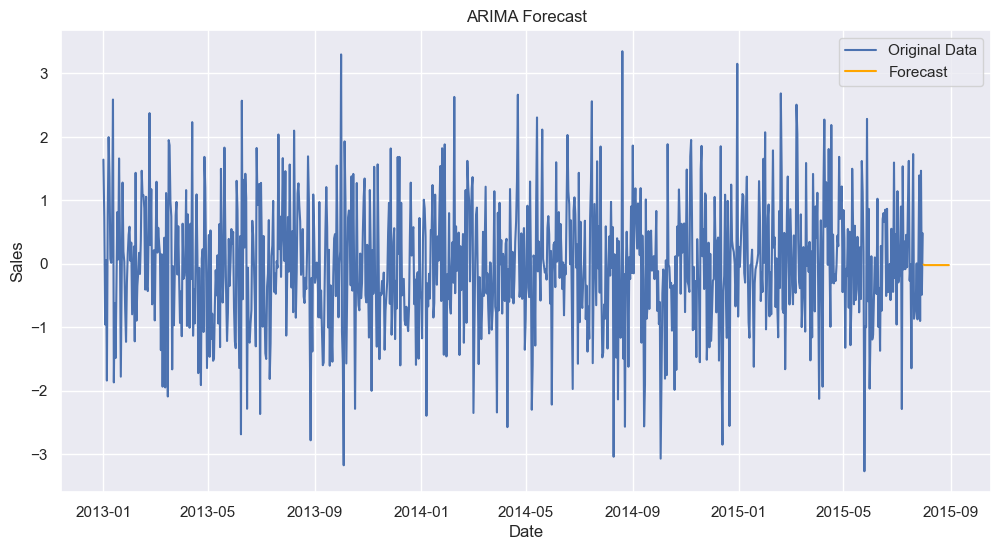

In [123]:
from statsmodels.tsa.arima.model import ARIMA


time_series_data = train_merged_data['SalesPerCustomer']

min_date = pd.to_datetime('2013-01-01')

max_date = pd.to_datetime('2015-07-31')

date_rng = pd.date_range(start=min_date, end=max_date, freq='D')

time_series_data = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Fit ARIMA model
model = ARIMA(time_series_data, order=(1, 0, 0))

model_fit = model.fit()

# Make predictions for the next 30 days

forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast

plt.figure(figsize=(12, 6))

plt.plot(time_series_data, label='Original Data')

plt.plot(forecast, label='Forecast', color='orange')

plt.legend()

plt.title('ARIMA Forecast')

plt.xlabel('Date')

plt.ylabel('Sales')

plt.show()

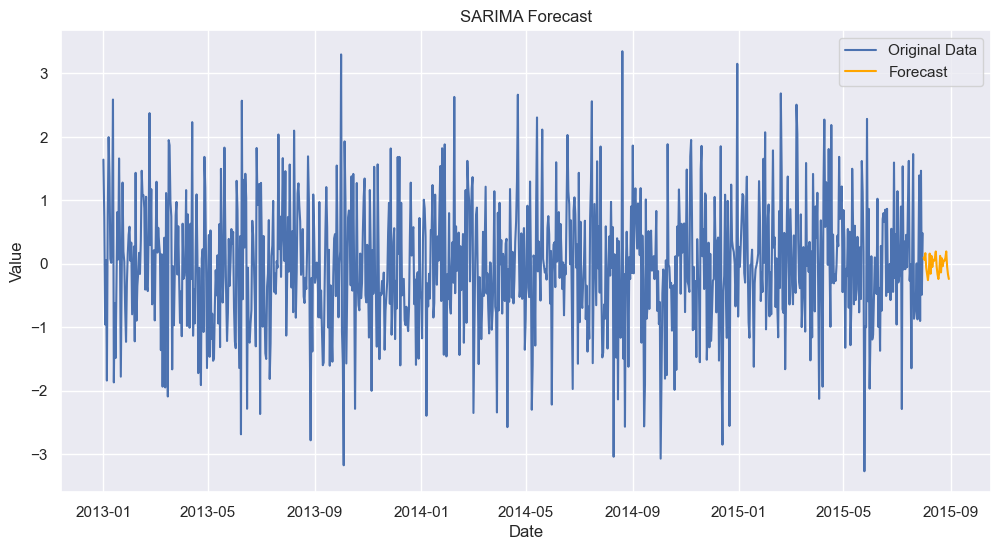

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model

model = SARIMAX(time_series_data, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))

model_fit = model.fit()

# Make predictions for the next 30 days

forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast

plt.figure(figsize=(12, 6))

plt.plot(time_series_data, label='Original Data')

plt.plot(forecast, label='Forecast', color='orange')

plt.legend()

plt.title('SARIMA Forecast')

plt.xlabel('Date')

plt.ylabel('Value')

plt.show()

# ExponentialSmoothing

In [126]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
     

C:\Users\shita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\shita\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


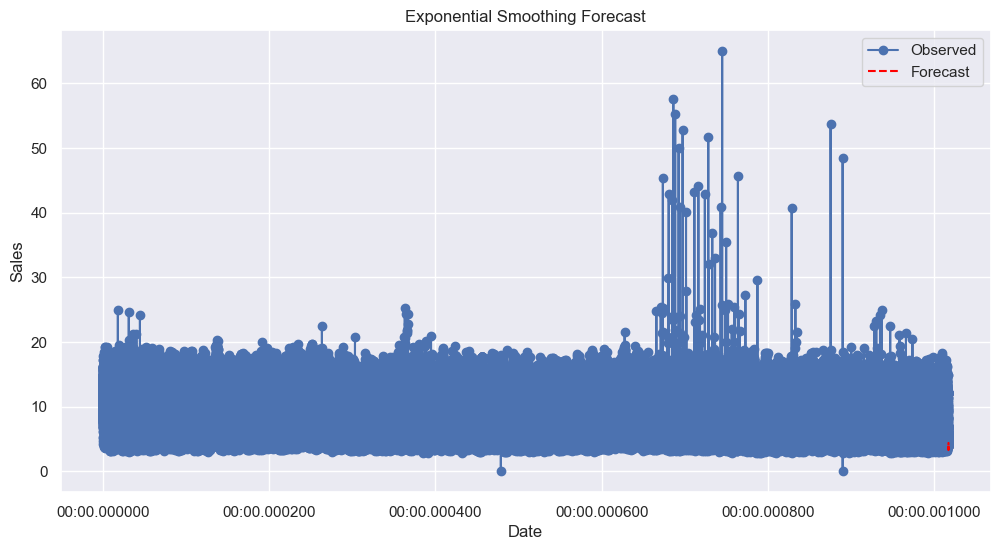

In [127]:
# Define the parameters for exponential smoothing

smoothing_level = 0.8  # Smoothing parameter for level

smoothing_trend = 0.2  # Smoothing parameter for trend

seasonal_periods = 12  # Number of seasons per year (e.g., 12 for monthly data)

# Perform exponential smoothing
model = ExponentialSmoothing(
    train_merged_data['SalesPerCustomer'],
    trend='add',  # 'add' for additive trend, 'multiplicative' for multiplicative trend
    seasonal='add',  # 'add' for additive seasonality, 'multiplicative' for multiplicative seasonality
    seasonal_periods=seasonal_periods,
    initialization_method="estimated",
)
result = model.fit(smoothing_level=smoothing_level, smoothing_trend=smoothing_trend)

# Generate forecasts
forecast_steps = 12  # Adjust the number of forecast steps as needed

forecast = result.forecast(steps=forecast_steps)

# Plot the observed data and forecasts
plt.figure(figsize=(12, 6))

plt.plot(train_merged_data.index,  train_merged_data['SalesPerCustomer'], label='Observed', marker='o', linestyle='-')

plt.plot(forecast.index, forecast, label='Forecast', color='red', linestyle='--')

plt.title('Exponential Smoothing Forecast')

plt.xlabel('Date')

plt.ylabel('Sales')

plt.legend()

plt.grid(True)

plt.show()
     

C:\Users\shita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\shita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\shita\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


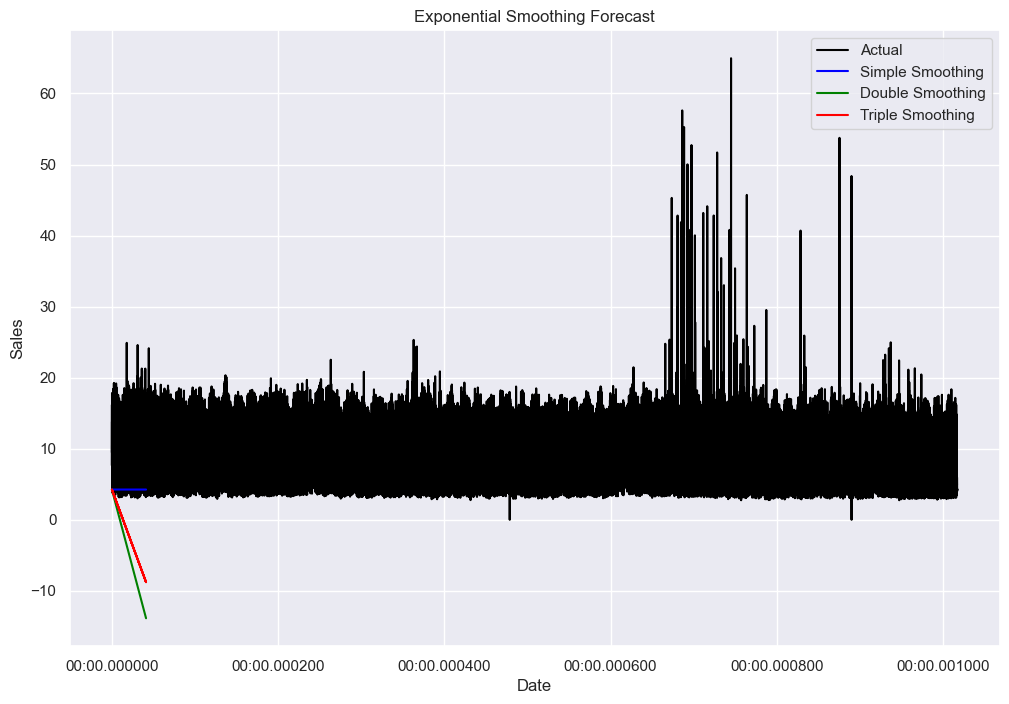

In [128]:
# Simple Exponential Smoothing
model_simple = ExponentialSmoothing(time_series, trend=None, seasonal=None)

model_fit_simple = model_simple.fit()

predictions_simple = model_fit_simple.predict(start=len(time_series), end=len(time_series) + len(test_merged_data) - 1)

# Double Exponential Smoothing (Holt's Method)

model_double = ExponentialSmoothing(time_series, trend='add', seasonal=None)

model_fit_double = model_double.fit()

predictions_double = model_fit_double.predict(start=len(time_series), end=len(time_series) + len(test_merged_data) - 1)

# Triple Exponential Smoothing (Holt-Winters' Method)

model_triple = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=7)

model_fit_triple = model_triple.fit()

predictions_triple = model_fit_triple.predict(start=len(time_series), end=len(time_series) + len(test_merged_data) - 1)

# Plot actual vs. predicted values for all methods

plt.figure(figsize=(12, 8))

plt.plot(time_series, label='Actual', color='black')

plt.plot(test_merged_data.index, predictions_simple, label='Simple Smoothing', color='blue')

plt.plot(test_merged_data.index, predictions_double, label="Double Smoothing", color='green')

plt.plot(test_merged_data.index, predictions_triple, label="Triple Smoothing", color='red')

plt.legend()

plt.title('Exponential Smoothing Forecast')

plt.xlabel('Date')

plt.ylabel('Sales')

plt.show()

     


In [129]:
!!pip install Prophet
     

['Requirement already satisfied: Prophet in c:\\users\\shita\\anaconda3\\lib\\site-packages (1.1.5)',
 'Requirement already satisfied: cmdstanpy>=1.0.4 in c:\\users\\shita\\anaconda3\\lib\\site-packages (from Prophet) (1.2.0)',
 'Requirement already satisfied: numpy>=1.15.4 in c:\\users\\shita\\anaconda3\\lib\\site-packages (from Prophet) (1.24.3)',
 'Requirement already satisfied: matplotlib>=2.0.0 in c:\\users\\shita\\anaconda3\\lib\\site-packages (from Prophet) (3.7.1)',
 'Requirement already satisfied: pandas>=1.0.4 in c:\\users\\shita\\anaconda3\\lib\\site-packages (from Prophet) (1.5.3)',
 'Requirement already satisfied: holidays>=0.25 in c:\\users\\shita\\anaconda3\\lib\\site-packages (from Prophet) (0.39)',
 'Requirement already satisfied: tqdm>=4.36.1 in c:\\users\\shita\\anaconda3\\lib\\site-packages (from Prophet) (4.65.0)',
 'Requirement already satisfied: importlib-resources in c:\\users\\shita\\anaconda3\\lib\\site-packages (from Prophet) (6.1.1)',
 'Requirement already s

11:05:04 - cmdstanpy - INFO - Chain [1] start processing
11:07:27 - cmdstanpy - INFO - Chain [1] done processing


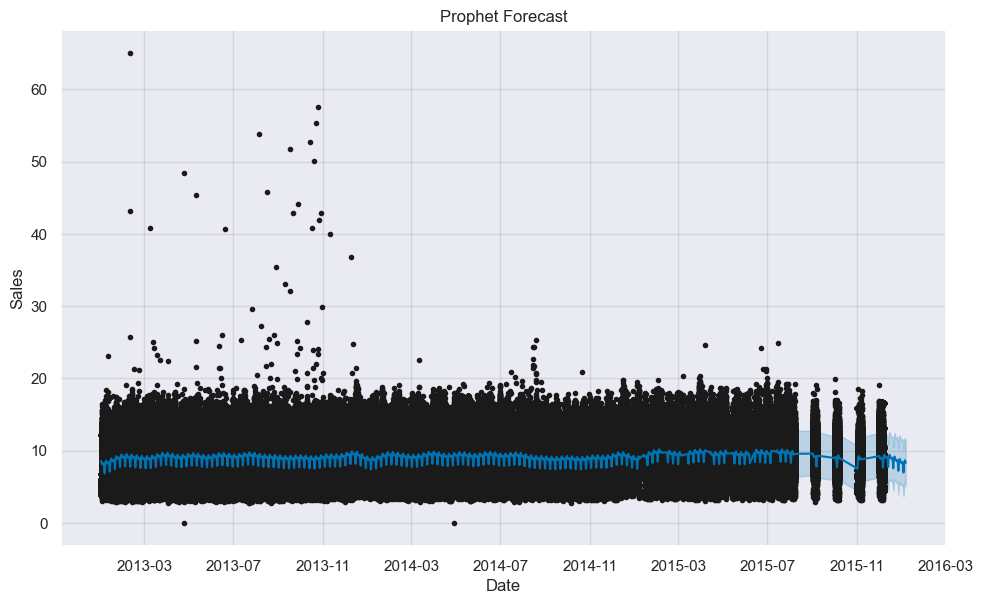

In [130]:
from prophet import Prophet

# Reset the index of the train_data_merged DataFrame

train_data_reset_index = train_merged_data.reset_index()

train_data_prophet = train_data_reset_index[['Date', 'SalesPerCustomer']].rename(columns={'Date': 'ds', 'SalesPerCustomer': 'y'})

# Create a sample time series data using the min and max dates

date_rng = pd.date_range(start=min_date, end=max_date, freq='D')

time_series_data = pd.DataFrame({'ds': date_rng, 'y': range(len(date_rng))})

# Fit Prophet model
model = Prophet()
model.fit(train_data_prophet)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=30)

# Make predictions for the next 30 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

plt.title('Prophet Forecast')

plt.xlabel('Date')

plt.ylabel('Sales')

plt.show()
     


In [131]:

pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [132]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [133]:
from tensorflow import keras

selected_column ='SalesPerCustomer'

time_series_data = train_merged_data[selected_column].values
     


In [134]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize the data

scaler = MinMaxScaler(feature_range=(0, 1))

normalized_data = scaler.fit_transform(time_series_data.reshape(-1, 1))

look_back = 10

# Prepare the input sequences and target values

X = []

y = []
for i in range(len(normalized_data) - look_back):
    
    X.append(normalized_data[i:i + look_back])
    
    y.append(normalized_data[i + look_back])
    
X = np.array(X)

y = np.array(y)

# Split the data into training and validation sets

split_ratio = 0.8

split_size= int(split_ratio * len(X))

X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]
     



Epoch 1/5

25430/25430 - 149s - loss: 9.5505e-04 - val_loss: 8.6402e-04 - 149s/epoch - 6ms/step
Epoch 2/5
25430/25430 - 150s - loss: 9.2296e-04 - val_loss: 8.5609e-04 - 150s/epoch - 6ms/step
Epoch 3/5
25430/25430 - 154s - loss: 9.0868e-04 - val_loss: 8.5399e-04 - 154s/epoch - 6ms/step
Epoch 4/5
25430/25430 - 144s - loss: 9.0051e-04 - val_loss: 8.3899e-04 - 144s/epoch - 6ms/step
Epoch 5/5
25430/25430 - 149s - loss: 8.8076e-04 - val_loss: 7.9509e-04 - 149s/epoch - 6ms/step


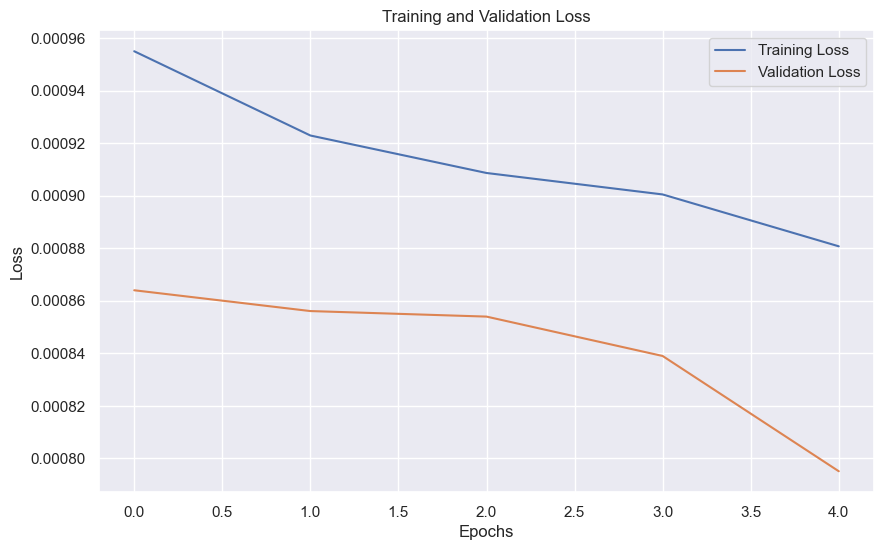

In [135]:
# Build the LSTM model

model = keras.Sequential()

model.add(keras.layers.LSTM(units=64, input_shape=(look_back, 1)))

model.add(keras.layers.Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Plot training loss and validation loss

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Training and Validation Loss')

plt.legend()

plt.show()


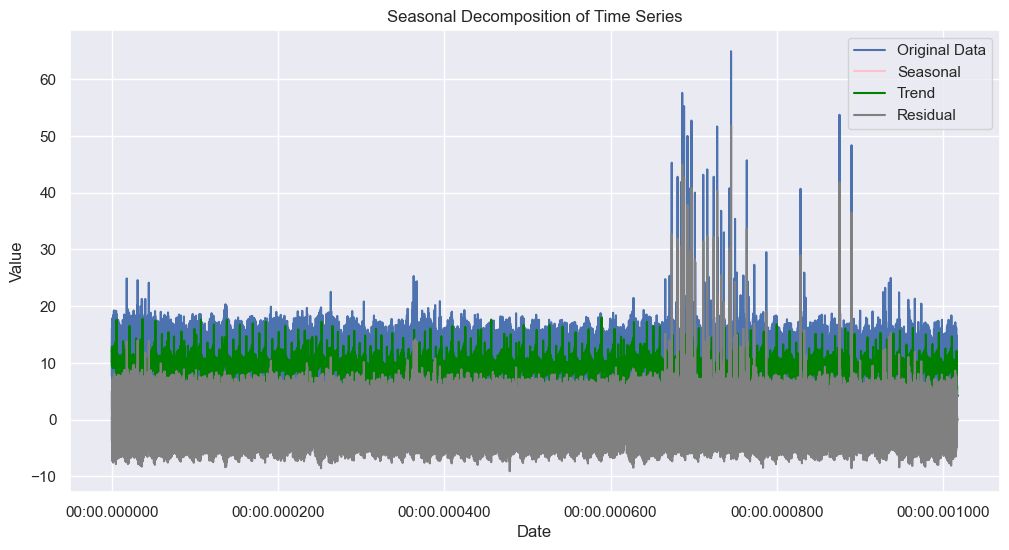

In [136]:
from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.seasonal import seasonal_decompose

selected_column ='SalesPerCustomer'

# Perform seasonal decomposition using statsmodels
decomposition = seasonal_decompose(train_merged_data[selected_column], period=13)

# Get the seasonal, trend, and residual components

seasonal = decomposition.seasonal

trend = decomposition.trend

residual = decomposition.resid

# Plot the components

plt.figure(figsize=(12, 6))

plt.plot(train_merged_data[selected_column], label='Original Data')

plt.plot(seasonal, label='Seasonal', color='Pink')

plt.plot(trend, label='Trend', color='green')

plt.plot(residual, label='Residual', color='gray')

plt.legend()

plt.title('Seasonal Decomposition of Time Series')

plt.xlabel('Date')

plt.ylabel('Value')

plt.show()

In [137]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)

model = Sequential()

model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(RepeatVector(30))

model.add(LSTM(units=100, return_sequences=True, activation='relu'))

model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True, activation='relu'))

model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True, activation='relu'))

model.add(LSTM(units=100, return_sequences=True, activation='relu'))

model.add(Bidirectional(LSTM(128, activation='relu')))

model.add(Dense(100, activation='relu'))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
     


In [140]:
import pickle

# Save the model using pickle

with open('lstm_model.pickle', 'wb') as f:
    
    pickle.dump(model, f)
     